Look at graphs generated from Generate_graphs_case_1

In [184]:
import pickle
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import tqdm
import sys
import datetime
import seaborn as sns

# My scripts
# add path to other folders, to import
import sys, os
sys.path.append(os.path.abspath(".."))
from util import plot_avg_degree, plot_G_density, plot_G_signs, fetch_raw_data, avg_degree, color_dark, cnt_pos_neg, plot_weight_signs

Load raw data

2014-10-01 00:00:00
2022-02-01 00:00:00


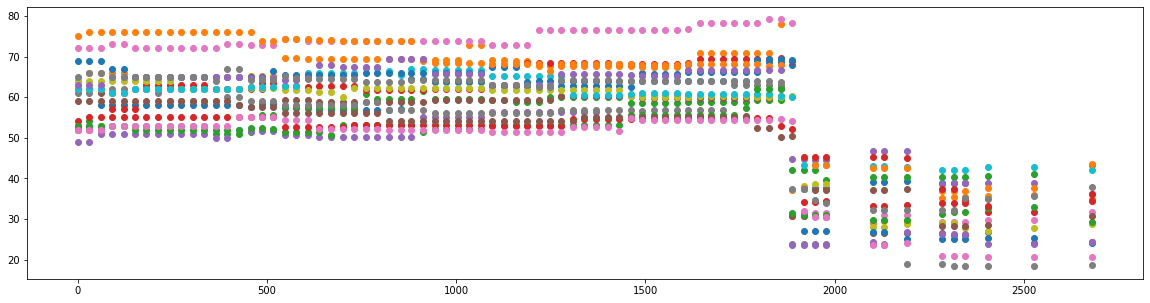

In [2]:
price_df, esg_pivot, sector_classification = fetch_raw_data("C:/Users/User/Code/MMD_Graph_Diversification/")
ind = esg_pivot.loc[:,np.isin(esg_pivot.columns, sector_classification['Energy'])]

fig, ax = plt.subplots(1,1, figsize = (20,5))
for i in range(ind.shape[1]):

    ax.scatter(range(ind.shape[0]),ind.iloc[:,i])

In [3]:
for k,v, in sector_classification.items():
    print(f'{k} {len(v)}')


Industrials 71
Healthcare 66
Technology 72
Communication Services 24
Consumer Defensive 34
Consumer Cyclical 64
Utilities 29
Financial Services 68
Basic Materials 21
Real Estate 30
Energy 21


In [4]:
gp_esg_stock = pd.read_pickle('../data/tidy/gp_esg_stock_data_frame.pkl')
gp_esg_stock.index

Index([2014-10-01, 2014-10-02, 2014-10-03, 2014-10-04, 2014-10-05, 2014-10-06,
       2014-10-07, 2014-10-08, 2014-10-09, 2014-10-10,
       ...
       2022-01-23, 2022-01-24, 2022-01-25, 2022-01-26, 2022-01-27, 2022-01-28,
       2022-01-29, 2022-01-30, 2022-01-31, 2022-02-01],
      dtype='object', name='date', length=2681)

# Check visuals

In [185]:
study = 'Utilities'
with open(f'../data/Graphs/{study}_d_1_winlen_300_gest_huge_glasso_ebic_scale_False_trans_nonparanormal.pkl', 'rb') as f:
    scale_F_nonparanormal = pickle.load(f)
with open(f'../data/Graphs/{study}_d_1_winlen_300_gest_huge_glasso_ebic_scale_False_trans_None.pkl', 'rb') as f:
    scale_F_none = pickle.load(f)
with open(f'../data/Graphs/{study}_d_1_winlen_300_gest_huge_glasso_ebic_scale_True_trans_None.pkl', 'rb') as f:
    scale_T_none = pickle.load(f)


Check how may assets, and which were excluded

In [126]:
study_stocks = gp_esg_stock.loc[:,np.isin(gp_esg_stock.columns, sector_classification[study])]
print(study_stocks.shape)
stocks_in_study = np.concatenate((scale_F_nonparanormal['stock_partition'][0][0], scale_F_nonparanormal['stock_partition'][1][0],scale_F_nonparanormal['stock_partition'][2][0]))

study_stocks.columns[~np.isin(study_stocks.columns, stocks_in_study)]


(2681, 64)


Index(['BLK', 'CFG', 'PYPL', 'USB'], dtype='object')

In [128]:
len(scale_F_nonparanormal['return_dict'][0][0])

20

look at lambdas

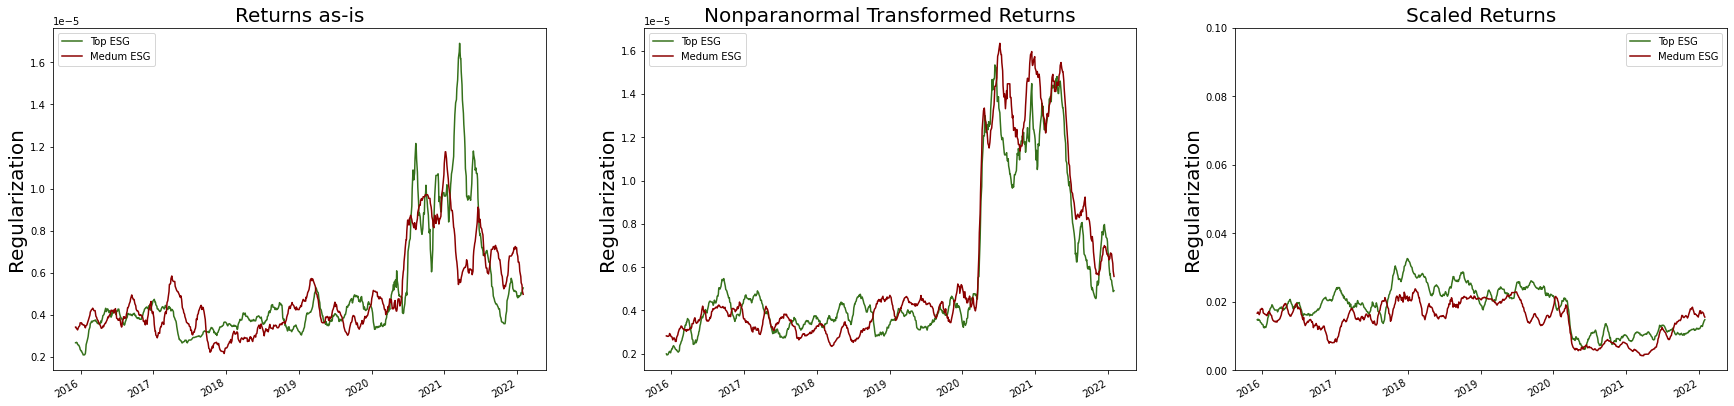

In [127]:

rw = 10
fig, ax = plt.subplots(1,3, figsize = (30,7))
pd.DataFrame(scale_F_none['opt_lambda'], index = scale_F_none['dates']).iloc[:,[1,2]].rolling(rw).mean().plot(ax = ax[0], color = color_dark[[0,2]])
ax[0].set_title('Returns as-is',fontdict={'fontsize':20,})
ax[0].set_ylabel('Regularization',fontdict={'fontsize':20,})
ax[0].legend(['Top ESG', 'Medum ESG', 'Low ESG'])

pd.DataFrame(scale_F_nonparanormal['opt_lambda'], index = scale_F_nonparanormal['dates']).iloc[:,[1,2]].rolling(rw).mean().plot(ax = ax[1], color = color_dark[[0,2]])
ax[1].set_title('Nonparanormal Transformed Returns',fontdict={'fontsize':20,})
ax[1].set_ylabel('Regularization',fontdict={'fontsize':20,})
ax[1].legend(['Top ESG', 'Medum ESG', 'Low ESG'])

pd.DataFrame(scale_T_none['opt_lambda'], index = scale_T_none['dates']).iloc[:,[1,2]].rolling(rw).mean().plot(ax = ax[2], color = color_dark[[0,2]])
ax[2].set_title('Scaled Returns',fontdict={'fontsize':20,})
ax[2].set_ylabel('Regularization',fontdict={'fontsize':20,})
ax[2].legend(['Top ESG', 'Medum ESG', 'Low ESG'])
ax[2].set_ylim([0,0.1])
fig.autofmt_xdate()

In [8]:
np.min(scale_F_none['opt_lambda'][0])

2.5950242113997377e-06

plot sample graph 

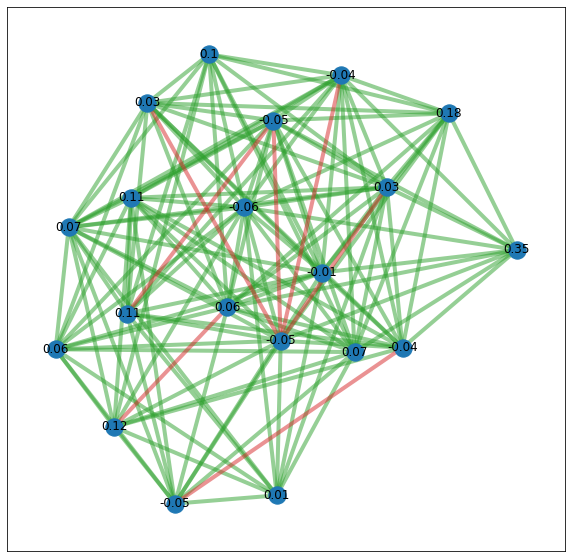

In [9]:
fig, ax = plt.subplots(1,1, figsize = (10,10))
graph_nr = 50
G = scale_F_nonparanormal['graph_dict'][0][graph_nr]
w = scale_F_nonparanormal['portfolios_info']['gmv']['weights'][0][graph_nr]
pos_edge = [(edge[0], edge[1]) for edge in G.edges(data = 'sign') if edge[2] == 1]
neg_edge = [(edge[0], edge[1]) for edge in G.edges(data = 'sign') if edge[2] == -1]
pos = nx.kamada_kawai_layout( G, weight=None)

nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G,pos,{i:np.round(w[i], 2) for i in range(len(w))})
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=pos_edge,
    width=4,
    alpha=0.5,
    edge_color="tab:green",
)

nx.draw_networkx_edges(
    G,
    pos,
    edgelist=neg_edge,
    width=4,
    alpha=0.5,
    edge_color="tab:red",
)

c:\Users\User\Code\MMD_Graph_Diversification\util.py:173: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, weight = 'weight').todense()
c:\Users\User\Code\MMD_Graph_Diversification\util.py:177: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, weight = 'weight').todense()
c:\Users\User\Code\MMD_Graph_Diversification\util.py:173: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, weight = 'weight').todense()
c:\Users\User\Code\MMD_Graph_Diversification\util.py:177: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, weight = 'weight').todense()
c:\Users\User\Code\MMD_Graph_Diversification\util.py:173: FutureWarning: adjacency_matrix will return a scipy.sparse array inste

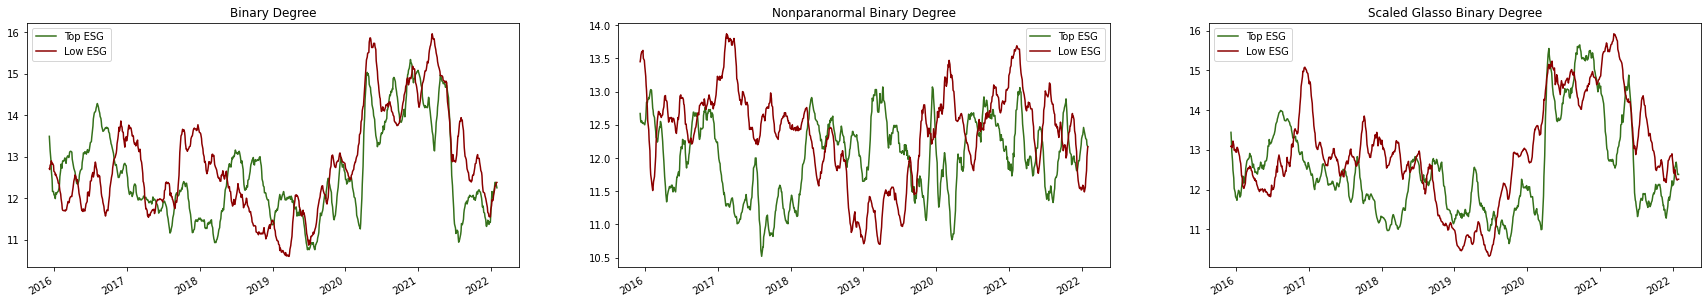

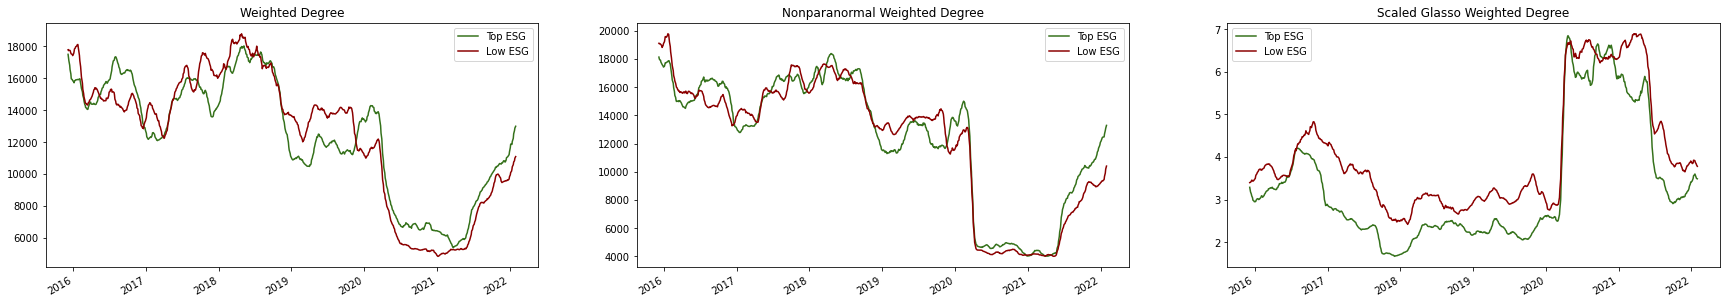

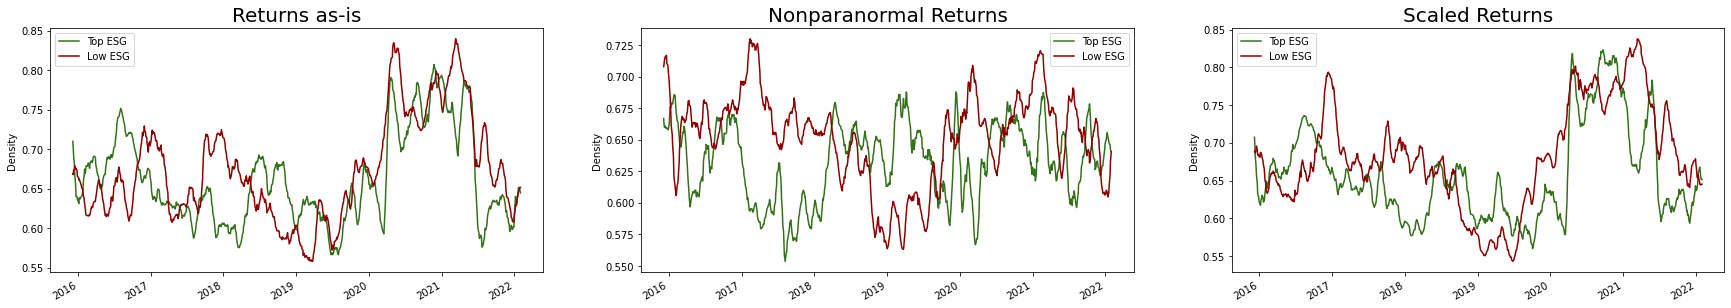

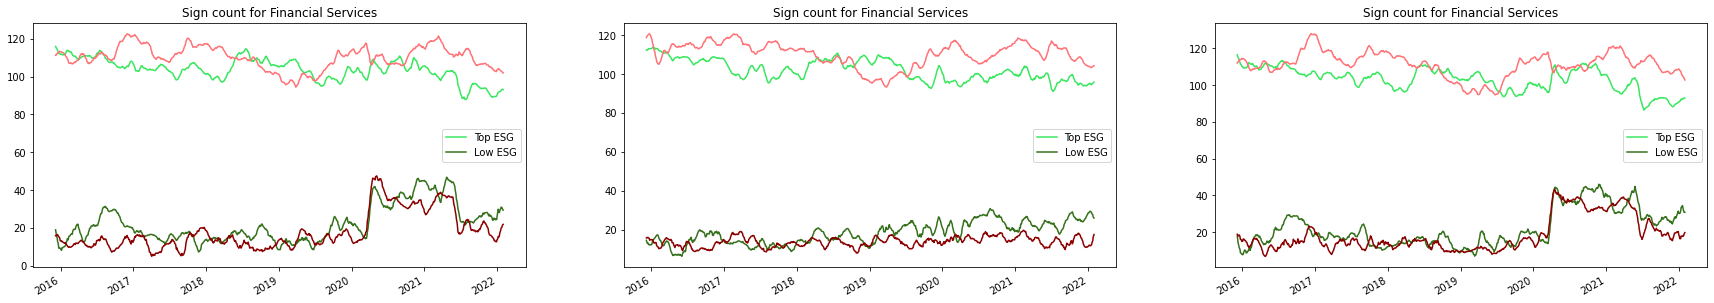

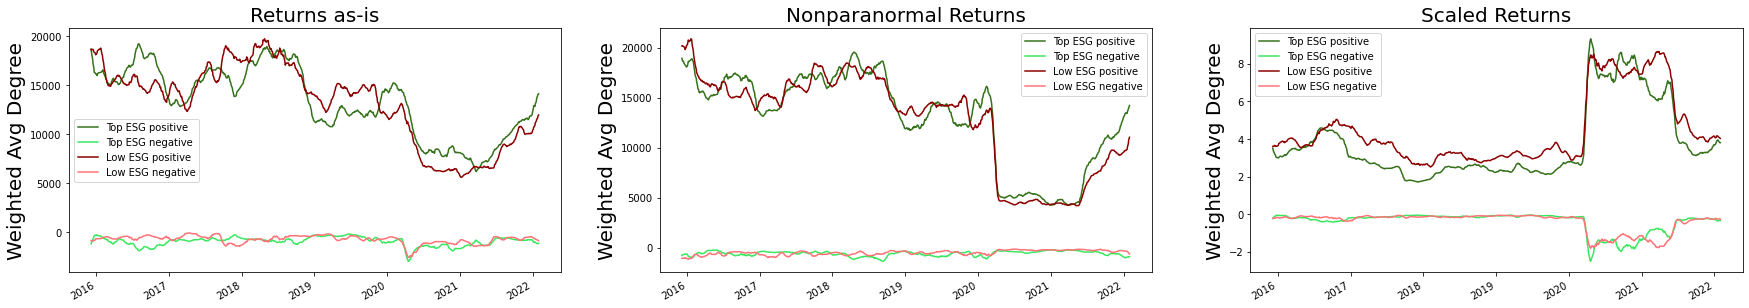

In [129]:
rw = 10
fig, ax = plt.subplots(1,3, figsize = (30,5))
plot_avg_degree(scale_F_none, ax = ax[0], title = f'Binary Degree', rolling_window= rw, group_iter = [0,2])
plot_avg_degree(scale_F_nonparanormal, ax = ax[1], title = f'Nonparanormal Binary Degree', rolling_window= rw, group_iter = [0,2])
plot_avg_degree(scale_T_none, ax = ax[2], title = f'Scaled Glasso Binary Degree', rolling_window= rw, group_iter = [0,2])
fig.autofmt_xdate()

fig, ax = plt.subplots(1,3, figsize = (30,5))
plot_avg_degree(scale_F_none, weight = 'weight', ax = ax[0], title = f'Weighted Degree', rolling_window= rw, group_iter = [0,2])
plot_avg_degree(scale_F_nonparanormal, weight = 'weight', ax = ax[1], title = f'Nonparanormal Weighted Degree', rolling_window= rw, group_iter = [0,2])
plot_avg_degree(scale_T_none, weight = 'weight', ax = ax[2], title = f'Scaled Glasso Weighted Degree', rolling_window= rw, group_iter = [0,2])
fig.autofmt_xdate()

fig, ax = plt.subplots(1,3, figsize = (30,5))
plot_G_density(scale_F_none,  ax = ax[0],  rolling_window= rw, group_iter = [0,2], title = f'Returns as-is')
plot_G_density(scale_F_nonparanormal, ax = ax[1], rolling_window= rw, group_iter = [0,2], title = f'Nonparanormal Returns')
plot_G_density(scale_T_none,  ax = ax[2], rolling_window= rw, group_iter = [0,2], title = f'Scaled Returns')
ax[0].set_ylabel('Density')
ax[1].set_ylabel('Density')
ax[2].set_ylabel('Density')
ax[0].set_title('Returns as-is',fontdict={'fontsize':20,})
ax[1].set_title('Nonparanormal Returns',fontdict={'fontsize':20,})
ax[2].set_title('Scaled Returns',fontdict={'fontsize':20,})
ax[0].tick_params( labelsize=10)
ax[1].tick_params( labelsize=10)
ax[2].tick_params( labelsize=10)
fig.autofmt_xdate()

fig, ax = plt.subplots(1,3, figsize = (30,5))
plot_G_signs(scale_F_none,  ax = ax[0],  rolling_window= rw, group_iter = [0,2])
plot_G_signs(scale_F_nonparanormal, ax = ax[1], rolling_window= rw, group_iter = [0,2])
plot_G_signs(scale_T_none,  ax = ax[2], rolling_window= rw, group_iter = [0,2])
fig.autofmt_xdate()

fig, ax = plt.subplots(1,3, figsize = (30,5))
plot_weight_signs(scale_F_none,  ax = ax[0],  rolling_window= rw, group_iter = [0,2], title = f'Returns as-is')
plot_weight_signs(scale_F_nonparanormal, ax = ax[1], rolling_window= rw, group_iter = [0,2], title = f'Nonparanormal Returns')
plot_weight_signs(scale_T_none,  ax = ax[2], rolling_window= rw, group_iter = [0,2], title = f'Scaled Returns')
ax[0].set_ylabel('Weighted Avg Degree',fontdict={'fontsize':20,})
ax[1].set_ylabel('Weighted Avg Degree',fontdict={'fontsize':20,})
ax[2].set_ylabel('Weighted Avg Degree',fontdict={'fontsize':20,})
ax[0].set_title('Returns as-is',fontdict={'fontsize':20,})
ax[1].set_title('Nonparanormal Returns',fontdict={'fontsize':20,})
ax[2].set_title('Scaled Returns',fontdict={'fontsize':20,})
ax[0].tick_params( labelsize=10)
ax[1].tick_params( labelsize=10)
ax[2].tick_params( labelsize=10)
fig.autofmt_xdate()


Compare best graph vs almost best

ESG dispersion

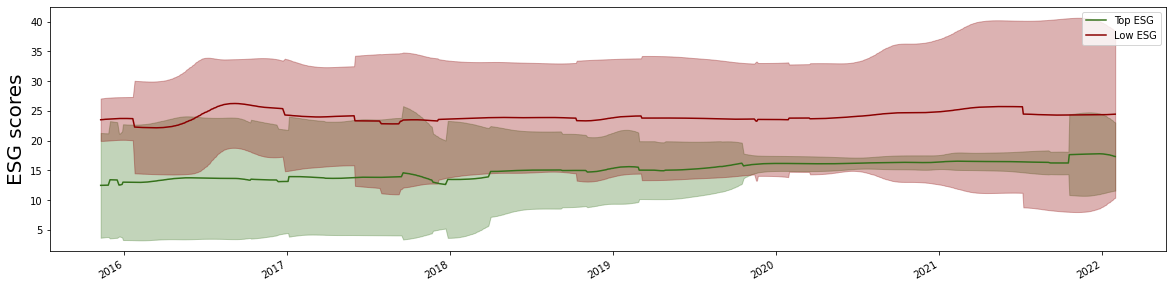

In [83]:
fig, ax = plt.subplots(1,1, figsize = (20,5))
ax.plot(scale_F_nonparanormal['dates'], scale_F_nonparanormal['esg_mean'][0], color = color_dark[0])
ax.plot(scale_F_nonparanormal['dates'], scale_F_nonparanormal['esg_mean'][2], color = color_dark[2])
ax.fill_between(
    scale_F_nonparanormal['dates'].ravel(),
    np.array(scale_F_nonparanormal['esg_mean'][0]) - 1.96 * np.array(scale_F_nonparanormal['esg_std'][0]),
    np.array(scale_F_nonparanormal['esg_mean'][0]) + 1.96 * np.array(scale_F_nonparanormal['esg_std'][0]),
    alpha=0.3,
    color = color_dark[0]
)

# ax.plot(scale_F_nonparanormal['dates'], scale_F_nonparanormal['esg_mean'][1], color = color_dark[1])
# ax.fill_between(
#     scale_F_nonparanormal['dates'].ravel(),
#     np.array(scale_F_nonparanormal['esg_mean'][1]) - 1.96 * np.array(scale_F_nonparanormal['esg_std'][1]),
#     np.array(scale_F_nonparanormal['esg_mean'][1]) + 1.96 * np.array(scale_F_nonparanormal['esg_std'][1]),
#     alpha=0.3,
#     color = color_dark[1]
# )

ax.fill_between(
    scale_F_nonparanormal['dates'].ravel(),
    np.array(scale_F_nonparanormal['esg_mean'][2]) - 1.96 * np.array(scale_F_nonparanormal['esg_std'][2]),
    np.array(scale_F_nonparanormal['esg_mean'][2]) + 1.96 * np.array(scale_F_nonparanormal['esg_std'][2]),
    alpha=0.3,
    color = color_dark[2]
)

ax.set_ylabel('ESG scores',fontdict={'fontsize':20,})


ax.tick_params( labelsize=10)
ax.legend(['Top ESG', 'Low ESG'])

fig.autofmt_xdate()

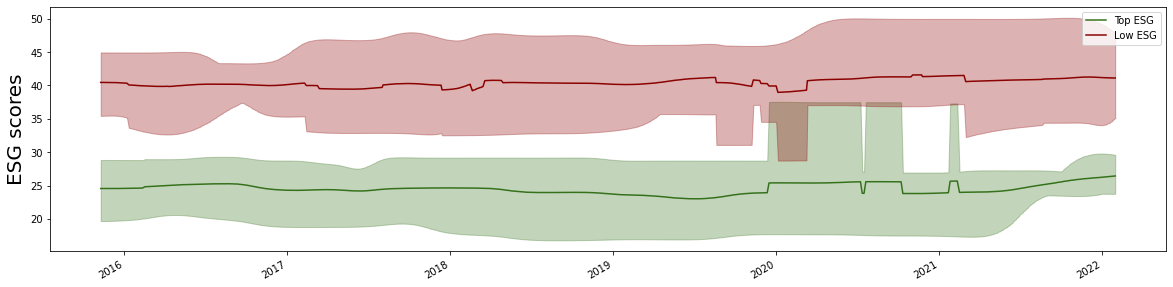

In [71]:
fig, ax = plt.subplots(1,1, figsize = (20,5))
ax.plot(scale_F_nonparanormal['dates'], scale_F_nonparanormal['esg_mean'][0], color = color_dark[0])
ax.plot(scale_F_nonparanormal['dates'], scale_F_nonparanormal['esg_mean'][2], color = color_dark[2])
ax.fill_between(
    scale_F_nonparanormal['dates'].ravel(),
    np.array(scale_F_nonparanormal['esg_min'][0]),
    np.array(scale_F_nonparanormal['esg_max'][0]),
    alpha=0.3,
    color = color_dark[0]
)

# ax.plot(scale_F_nonparanormal['dates'], scale_F_nonparanormal['esg_mean'][1], color = color_dark[1])
# ax.fill_between(
#     scale_F_nonparanormal['dates'].ravel(),
#     np.array(scale_F_nonparanormal['esg_mean'][1]) - 1.96 * np.array(scale_F_nonparanormal['esg_std'][1]),
#     np.array(scale_F_nonparanormal['esg_mean'][1]) + 1.96 * np.array(scale_F_nonparanormal['esg_std'][1]),
#     alpha=0.3,
#     color = color_dark[1]
# )

ax.fill_between(
    scale_F_nonparanormal['dates'].ravel(),
    np.array(scale_F_nonparanormal['esg_min'][2]),
    np.array(scale_F_nonparanormal['esg_max'][2]),
    alpha=0.3,
    color = color_dark[2]
)

ax.set_ylabel('ESG scores',fontdict={'fontsize':20,})


ax.tick_params( labelsize=10)
ax.legend(['Top ESG', 'Low ESG'])

fig.autofmt_xdate()

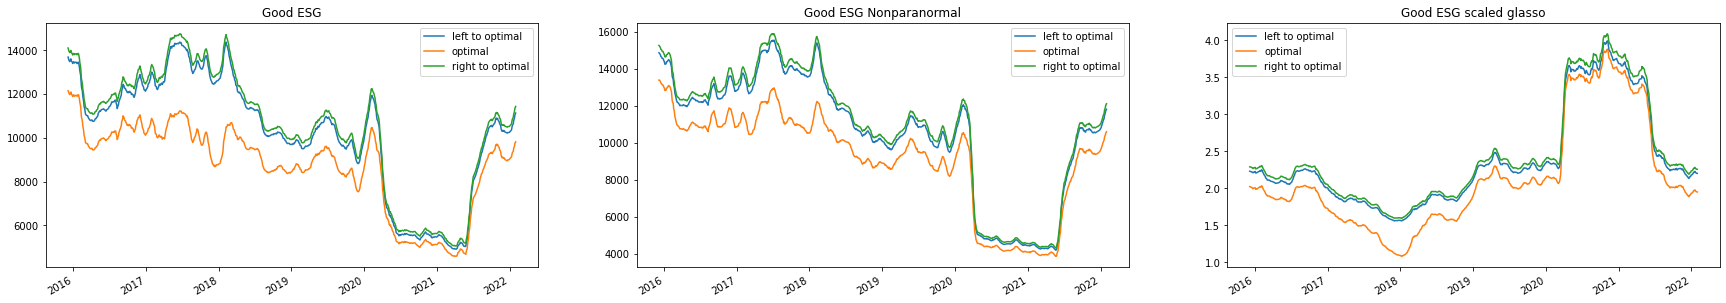

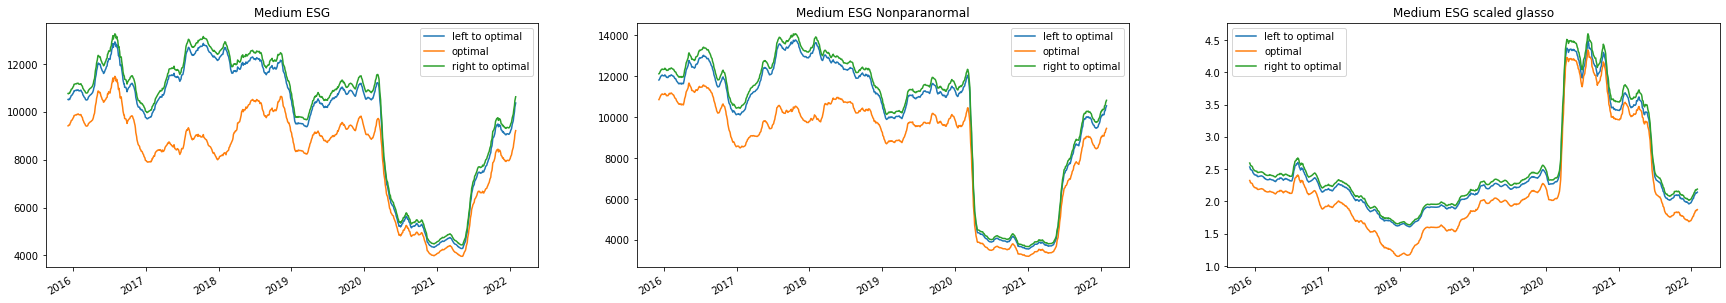

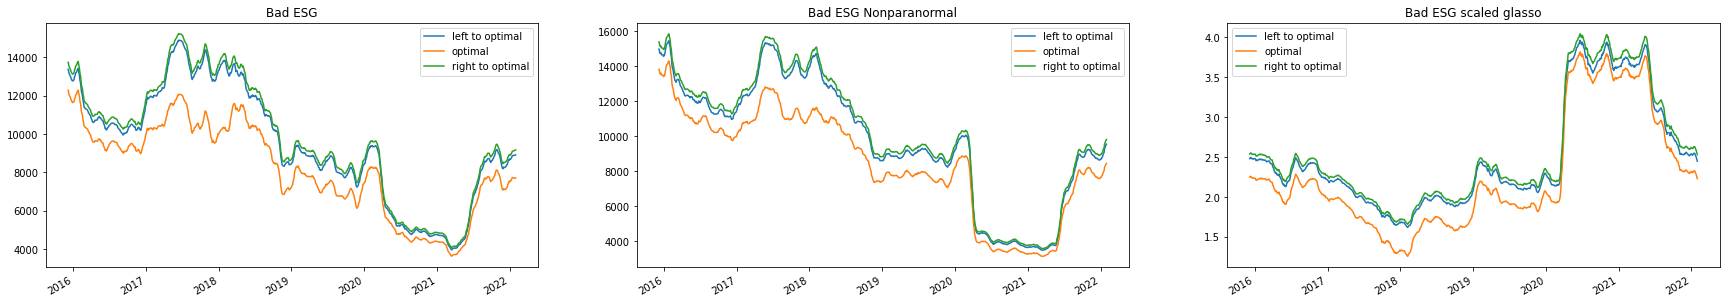

In [23]:
def compare_best_next(df, ax, group, title = '', weight = 'weight'):
    i = group
    # minus one
    avg_degree_dict = [avg_degree(nx.from_numpy_array(df['prec_dict_minus_1'][i][j]), weight) for j in range(len(df['prec_dict_minus_1'][i]))]
    ax.plot(df['dates'], pd.DataFrame(avg_degree_dict).rolling(10).mean().iloc[:,0], label = 'left to optimal')
    # best
    avg_degree_dict = [avg_degree(df['graph_dict'][i][j], weight) for j in range(len(df['prec_dict_minus_1'][i]))]
    ax.plot(df['dates'], pd.DataFrame(avg_degree_dict).rolling(10).mean().iloc[:,0], label = 'optimal')
    # plus one
    avg_degree_dict = [avg_degree(nx.from_numpy_array(g), weight) if type(g) is not float else np.nan for j, g in enumerate(df['prec_dict_plus_1'][i])]
    ax.plot(df['dates'], pd.DataFrame(avg_degree_dict).rolling(10).mean().iloc[:,0], label = 'right to optimal')
    ax.set_title(title)
    ax.legend()

weight = 'weight'
fig, ax = plt.subplots(1,3, figsize = (30,5))
compare_best_next(scale_F_none, ax = ax[0], group=0, title = 'Good ESG', weight = weight)
compare_best_next(scale_F_nonparanormal, ax = ax[1], group=0, title = f'Good ESG Nonparanormal', weight = weight)
compare_best_next(scale_T_none, ax = ax[2], group=0,  title = f'Good ESG scaled glasso', weight = weight)
fig.autofmt_xdate()
fig, ax = plt.subplots(1,3, figsize = (30,5))
compare_best_next(scale_F_none, ax = ax[0], group=1, title = 'Medium ESG', weight = weight)
compare_best_next(scale_F_nonparanormal, ax = ax[1], group=1, title = f'Medium ESG Nonparanormal', weight = weight)
compare_best_next(scale_T_none, ax = ax[2], group=1,  title = f'Medium ESG scaled glasso', weight = weight)
fig.autofmt_xdate()
fig, ax = plt.subplots(1,3, figsize = (30,5))
compare_best_next(scale_F_none, ax = ax[0], group=2, title = 'Bad ESG', weight = weight)
compare_best_next(scale_F_nonparanormal, ax = ax[1], group=2, title = f'Bad ESG Nonparanormal', weight = weight)
compare_best_next(scale_T_none, ax = ax[2], group=2,  title = f'Bad ESG scaled glasso', weight = weight)
fig.autofmt_xdate()




Most differences for the as-is graph estimation

portfolio

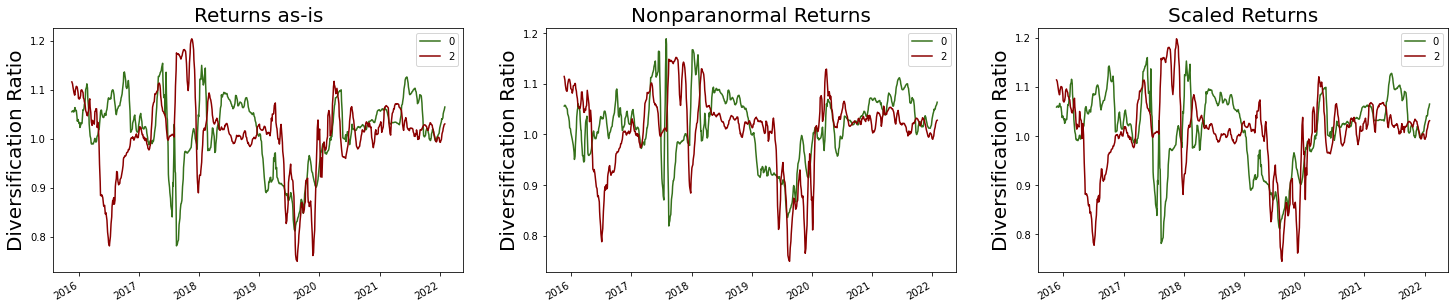

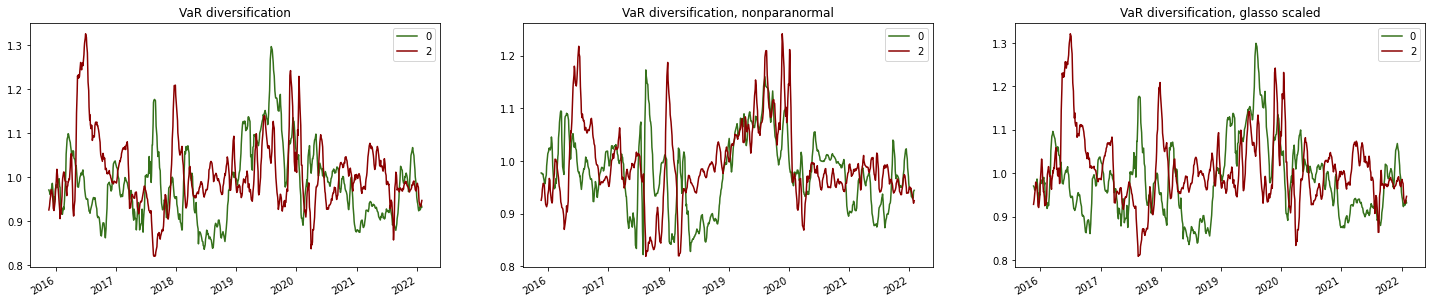

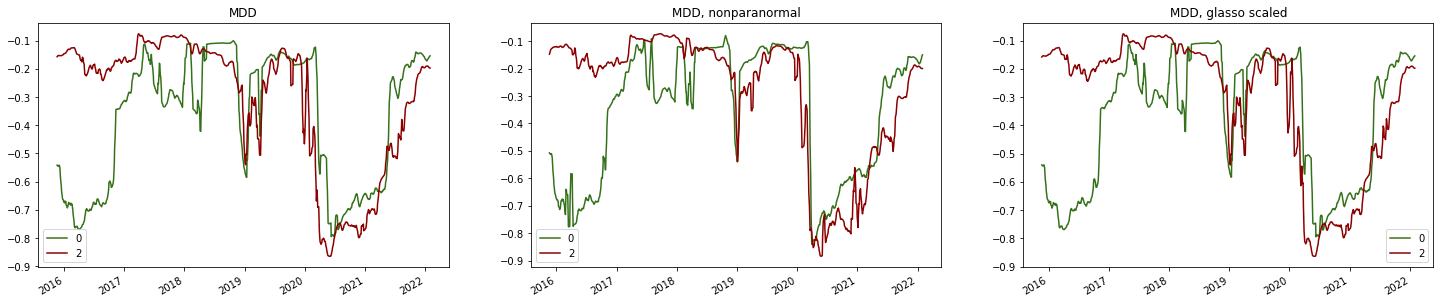

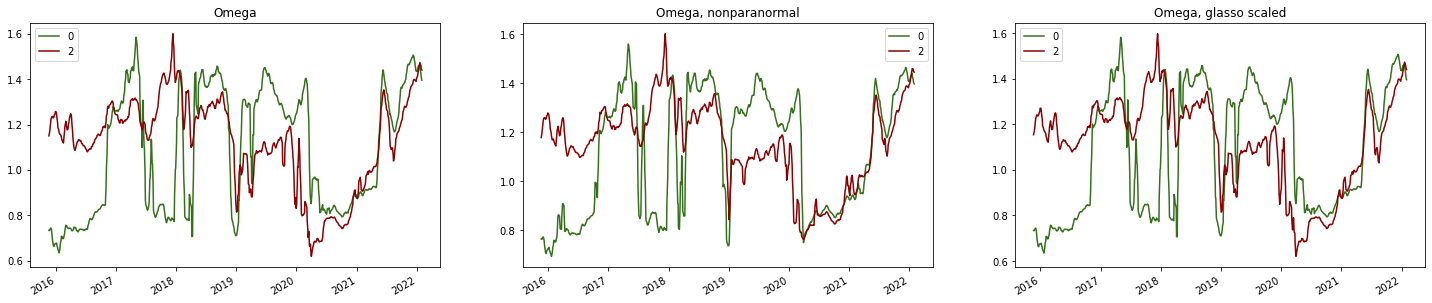

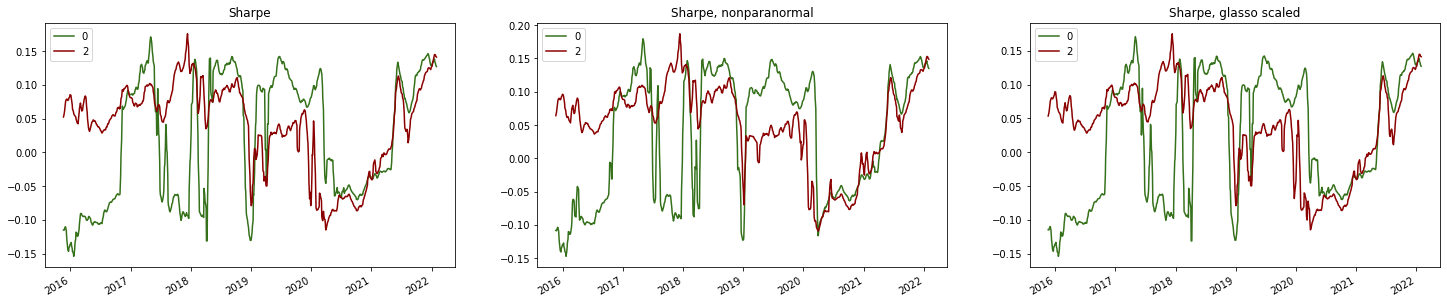

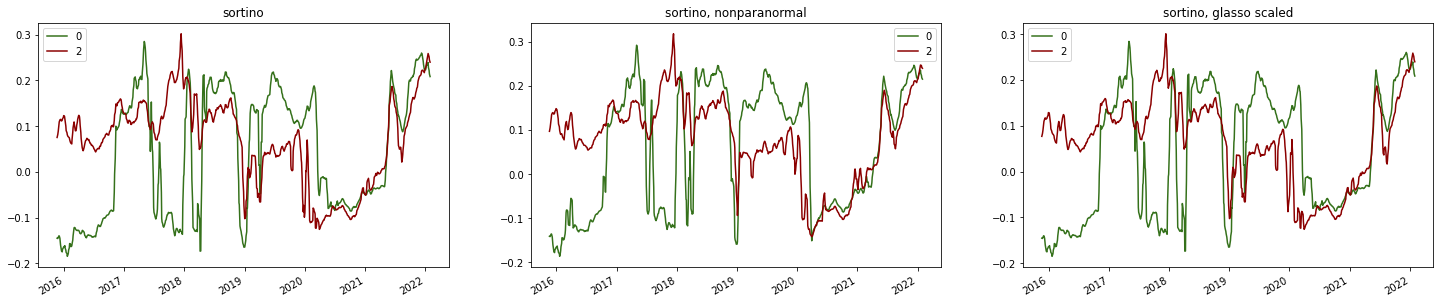

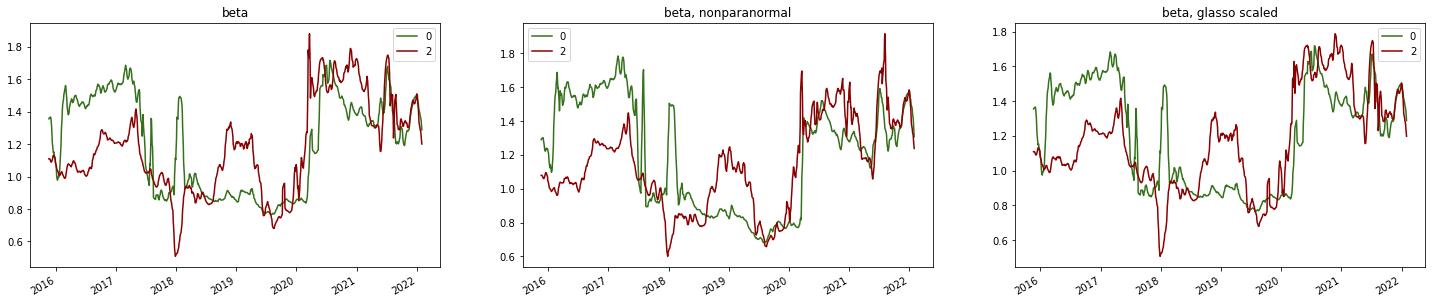

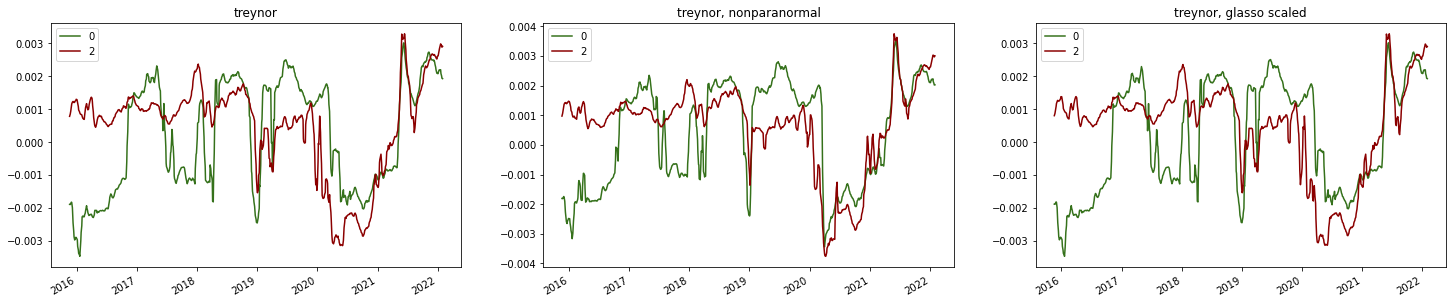

In [52]:
port_type = 'sharpe'
fig, ax = plt.subplots(1,3, figsize = (25,5))
rmean = 5
pd.DataFrame(scale_F_none['portfolios_info'][port_type]['cov_div'], index = scale_F_none['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[0], color = color_dark[[0,2]], title = f'COV diversification')
pd.DataFrame(scale_F_nonparanormal['portfolios_info'][port_type]['cov_div'], index = scale_F_none['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[1], color = color_dark[[0,2]], title = f'COV diversification, nonparanormal')
pd.DataFrame(scale_T_none['portfolios_info'][port_type]['cov_div'], index = scale_F_none['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[2], color = color_dark[[0,2]], title = f'COV diversification, glasso scaled')
ax[0].set_ylabel('Diversification Ratio',fontdict={'fontsize':20,})
ax[1].set_ylabel('Diversification Ratio',fontdict={'fontsize':20,})
ax[2].set_ylabel('Diversification Ratio',fontdict={'fontsize':20,})
ax[0].set_title('Returns as-is',fontdict={'fontsize':20,})
ax[1].set_title('Nonparanormal Returns',fontdict={'fontsize':20,})
ax[2].set_title('Scaled Returns',fontdict={'fontsize':20,})
ax[0].tick_params( labelsize=10)
ax[1].tick_params( labelsize=10)
ax[2].tick_params( labelsize=10)
fig.autofmt_xdate()

fig, ax = plt.subplots(1,3, figsize = (25,5))
pd.DataFrame(scale_F_none['portfolios_info'][port_type]['var_div'], index = scale_F_none['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[0], color = color_dark[[0,2]], title = f'VaR diversification')
pd.DataFrame(scale_F_nonparanormal['portfolios_info'][port_type]['var_div'], index = scale_F_none['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[1], color = color_dark[[0,2]], title = f'VaR diversification, nonparanormal')
pd.DataFrame(scale_T_none['portfolios_info'][port_type]['var_div'], index = scale_F_none['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[2], color = color_dark[[0,2]], title = f'VaR diversification, glasso scaled')
fig.autofmt_xdate()

fig, ax = plt.subplots(1,3, figsize = (25,5))
pd.DataFrame(scale_F_none['portfolios_info'][port_type]['max_draw'], index = scale_F_none['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[0], color = color_dark[[0,2]], title = f'MDD')
pd.DataFrame(scale_F_nonparanormal['portfolios_info'][port_type]['max_draw'], index = scale_F_none['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[1], color = color_dark[[0,2]], title = f'MDD, nonparanormal')
pd.DataFrame(scale_T_none['portfolios_info'][port_type]['max_draw'], index = scale_F_none['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[2], color = color_dark[[0,2]], title = f'MDD, glasso scaled')
fig.autofmt_xdate()


fig, ax = plt.subplots(1,3, figsize = (25,5))
pd.DataFrame(scale_F_none['portfolios_info'][port_type]['omega'], index = scale_F_none['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[0], color = color_dark[[0,2]], title = f'Omega')
pd.DataFrame(scale_F_nonparanormal['portfolios_info'][port_type]['omega'], index = scale_F_none['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[1], color = color_dark[[0,2]], title = f'Omega, nonparanormal')
pd.DataFrame(scale_T_none['portfolios_info'][port_type]['omega'], index = scale_F_none['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[2], color = color_dark[[0,2]], title = f'Omega, glasso scaled')
fig.autofmt_xdate()

fig, ax = plt.subplots(1,3, figsize = (25,5))
pd.DataFrame(scale_F_none['portfolios_info'][port_type]['sharpe'], index = scale_F_none['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[0], color = color_dark[[0,2]], title = f'Sharpe')
pd.DataFrame(scale_F_nonparanormal['portfolios_info'][port_type]['sharpe'], index = scale_F_none['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[1], color = color_dark[[0,2]], title = f'Sharpe, nonparanormal')
pd.DataFrame(scale_T_none['portfolios_info'][port_type]['sharpe'], index = scale_F_none['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[2], color = color_dark[[0,2]], title = f'Sharpe, glasso scaled')
fig.autofmt_xdate()

fig, ax = plt.subplots(1,3, figsize = (25,5))
pd.DataFrame(scale_F_none['portfolios_info'][port_type]['sortino'], index = scale_F_none['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[0], color = color_dark[[0,2]], title = f'sortino')
pd.DataFrame(scale_F_nonparanormal['portfolios_info'][port_type]['sortino'], index = scale_F_none['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[1], color = color_dark[[0,2]], title = f'sortino, nonparanormal')
pd.DataFrame(scale_T_none['portfolios_info'][port_type]['sortino'], index = scale_F_none['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[2], color = color_dark[[0,2]], title = f'sortino, glasso scaled')
fig.autofmt_xdate()

fig, ax = plt.subplots(1,3, figsize = (25,5))
pd.DataFrame(scale_F_none['portfolios_info'][port_type]['beta'], index = scale_F_none['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[0], color = color_dark[[0,2]], title = f'beta')
pd.DataFrame(scale_F_nonparanormal['portfolios_info'][port_type]['beta'], index = scale_F_none['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[1], color = color_dark[[0,2]], title = f'beta, nonparanormal')
pd.DataFrame(scale_T_none['portfolios_info'][port_type]['beta'], index = scale_F_none['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[2], color = color_dark[[0,2]], title = f'beta, glasso scaled')
fig.autofmt_xdate()

fig, ax = plt.subplots(1,3, figsize = (25,5))
pd.DataFrame(scale_F_none['portfolios_info'][port_type]['treynor'], index = scale_F_none['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[0], color = color_dark[[0,2]], title = f'treynor')
pd.DataFrame(scale_F_nonparanormal['portfolios_info'][port_type]['treynor'], index = scale_F_none['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[1], color = color_dark[[0,2]], title = f'treynor, nonparanormal')
pd.DataFrame(scale_T_none['portfolios_info'][port_type]['treynor'], index = scale_F_none['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[2], color = color_dark[[0,2]], title = f'treynor, glasso scaled')
fig.autofmt_xdate()



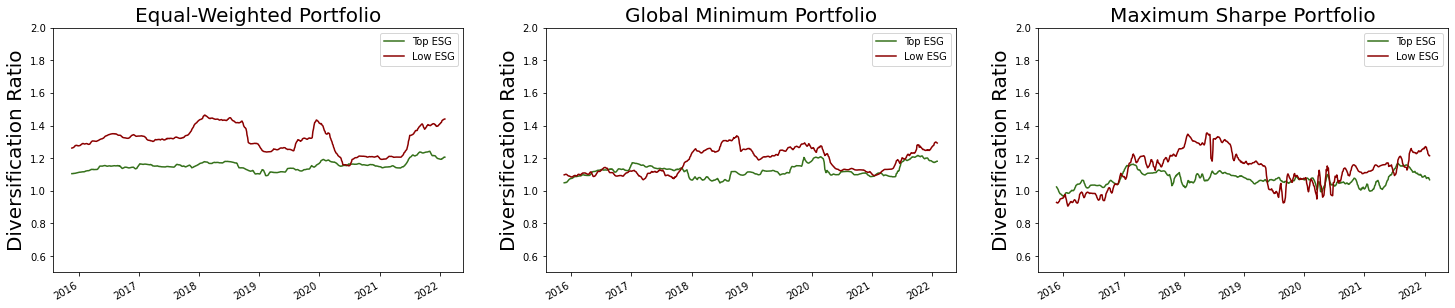

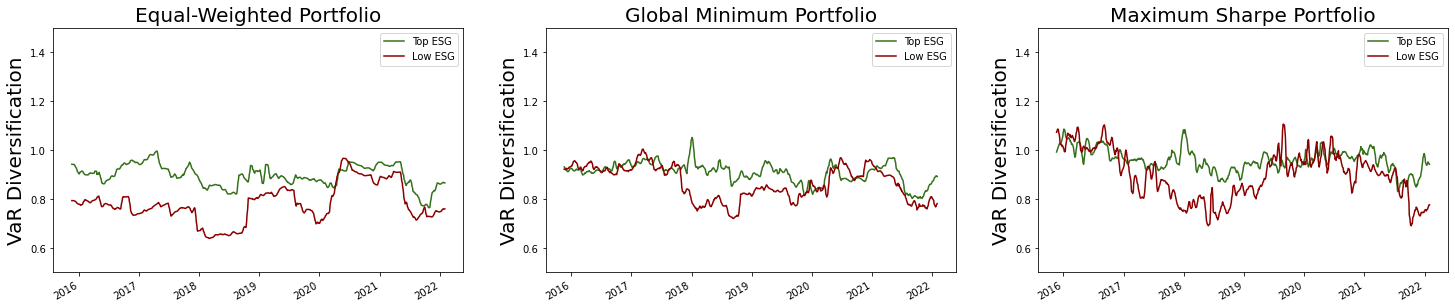

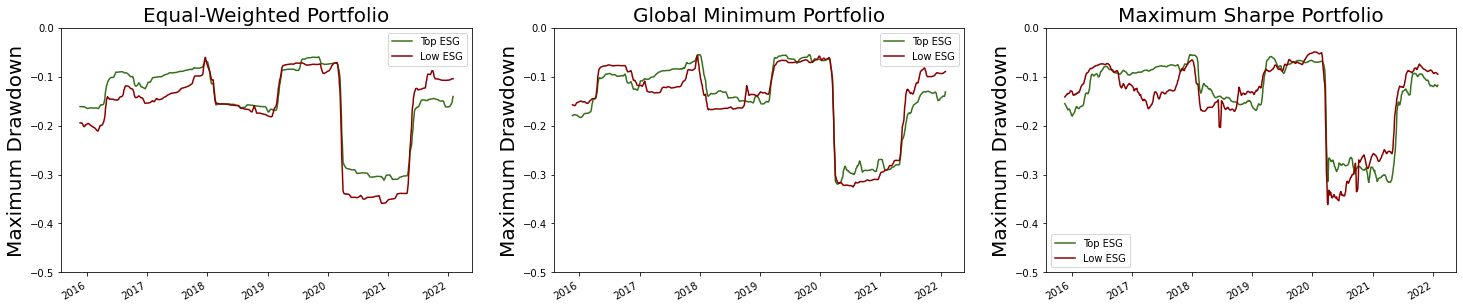

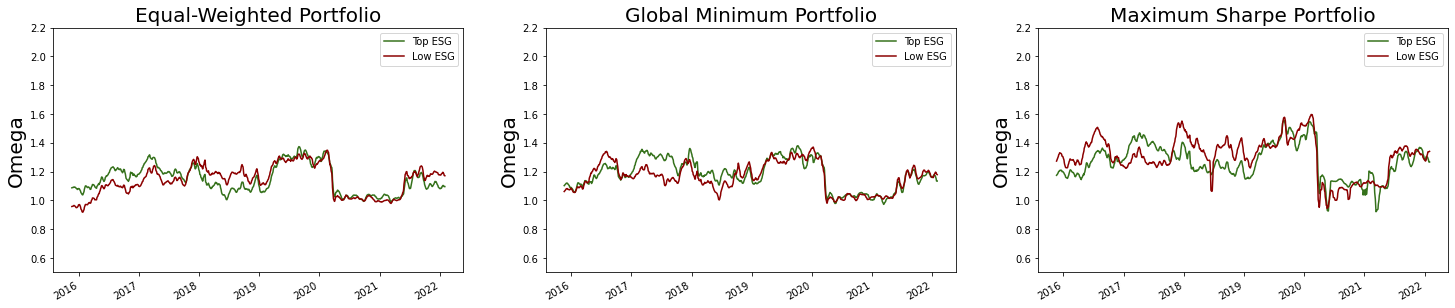

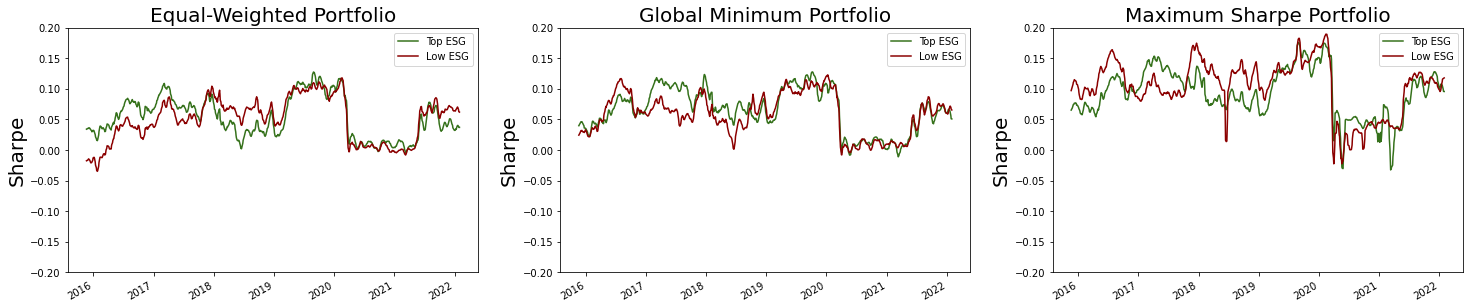

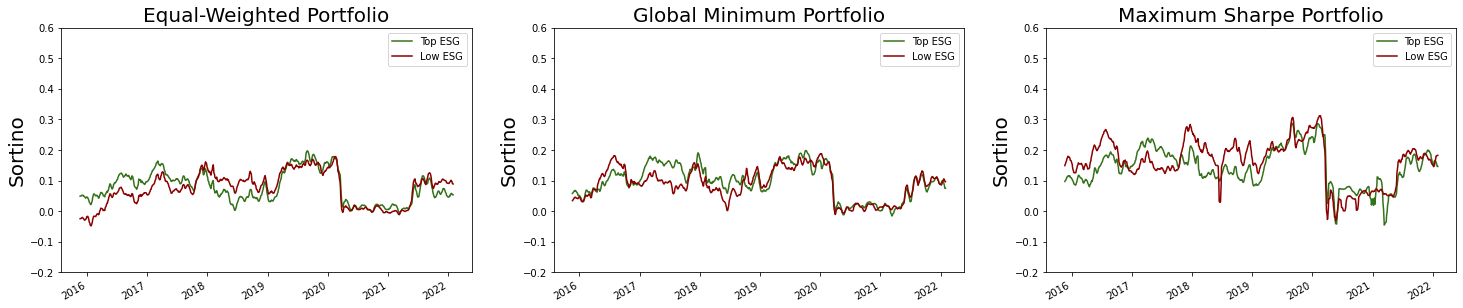

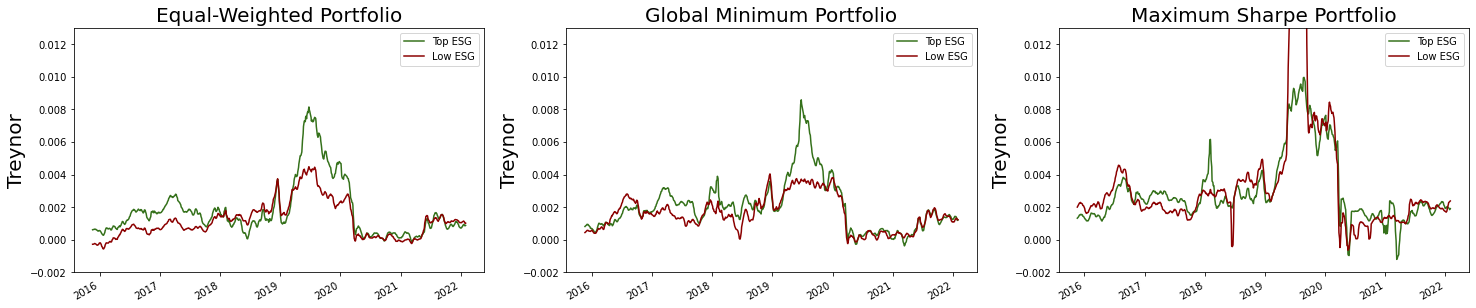

In [170]:
rmean = 5

fig, ax = plt.subplots(1,3, figsize = (25,5))
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['uniform']['cov_div'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[0], color = color_dark[[0,2]], title = f'COV diversification')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['gmv']['cov_div'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[1], color = color_dark[[0,2]], title = f'COV diversification, nonparanormal')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['sharpe']['cov_div'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[2], color = color_dark[[0,2]], title = f'COV diversification, glasso scaled')
ax[0].set_ylabel('Diversification Ratio',fontdict={'fontsize':20,})
ax[1].set_ylabel('Diversification Ratio',fontdict={'fontsize':20,})
ax[2].set_ylabel('Diversification Ratio',fontdict={'fontsize':20,})
ax[0].set_title('Equal-Weighted Portfolio',fontdict={'fontsize':20,})
ax[1].set_title('Global Minimum Portfolio',fontdict={'fontsize':20,})
ax[2].set_title('Maximum Sharpe Portfolio',fontdict={'fontsize':20,})
ax[0].tick_params( labelsize=10)
ax[1].tick_params( labelsize=10)
ax[2].tick_params( labelsize=10)
ax[0].legend(['Top ESG', 'Low ESG'])
ax[1].legend(['Top ESG', 'Low ESG'])
ax[2].legend(['Top ESG', 'Low ESG'])
y_lim = [0.5,2]
ax[0].set_ylim(y_lim)
ax[1].set_ylim(y_lim)
ax[2].set_ylim(y_lim)
fig.autofmt_xdate()

fig, ax = plt.subplots(1,3, figsize = (25,5))
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['uniform']['var_div'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[0], color = color_dark[[0,2]], title = f'COV diversification')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['gmv']['var_div'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[1], color = color_dark[[0,2]], title = f'COV diversification, nonparanormal')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['sharpe']['var_div'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[2], color = color_dark[[0,2]], title = f'COV diversification, glasso scaled')
ax[0].set_ylabel('VaR Diversification',fontdict={'fontsize':20,})
ax[1].set_ylabel('VaR Diversification',fontdict={'fontsize':20,})
ax[2].set_ylabel('VaR Diversification',fontdict={'fontsize':20,})
ax[0].set_title('Equal-Weighted Portfolio',fontdict={'fontsize':20,})
ax[1].set_title('Global Minimum Portfolio',fontdict={'fontsize':20,})
ax[2].set_title('Maximum Sharpe Portfolio',fontdict={'fontsize':20,})
ax[0].tick_params( labelsize=10)
ax[1].tick_params( labelsize=10)
ax[2].tick_params( labelsize=10)
ax[0].legend(['Top ESG', 'Low ESG'])
ax[1].legend(['Top ESG', 'Low ESG'])
ax[2].legend(['Top ESG', 'Low ESG'])
y_lim = [0.5,1.5]
ax[0].set_ylim(y_lim)
ax[1].set_ylim(y_lim)
ax[2].set_ylim(y_lim)
fig.autofmt_xdate()

fig, ax = plt.subplots(1,3, figsize = (25,5))
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['uniform']['max_draw'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[0], color = color_dark[[0,2]], title = f'COV diversification')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['gmv']['max_draw'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[1], color = color_dark[[0,2]], title = f'COV diversification, nonparanormal')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['sharpe']['max_draw'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[2], color = color_dark[[0,2]], title = f'COV diversification, glasso scaled')
ax[0].set_ylabel('Maximum Drawdown',fontdict={'fontsize':20,})
ax[1].set_ylabel('Maximum Drawdown',fontdict={'fontsize':20,})
ax[2].set_ylabel('Maximum Drawdown',fontdict={'fontsize':20,})
ax[0].set_title('Equal-Weighted Portfolio',fontdict={'fontsize':20,})
ax[1].set_title('Global Minimum Portfolio',fontdict={'fontsize':20,})
ax[2].set_title('Maximum Sharpe Portfolio',fontdict={'fontsize':20,})
ax[0].tick_params( labelsize=10)
ax[1].tick_params( labelsize=10)
ax[2].tick_params( labelsize=10)
ax[0].legend(['Top ESG', 'Low ESG'])
ax[1].legend(['Top ESG', 'Low ESG'])
ax[2].legend(['Top ESG', 'Low ESG'])
y_lim = [-0.5,0]
ax[0].set_ylim(y_lim)
ax[1].set_ylim(y_lim)
ax[2].set_ylim(y_lim)
fig.autofmt_xdate()


fig, ax = plt.subplots(1,3, figsize = (25,5))
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['uniform']['omega'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[0], color = color_dark[[0,2]], title = f'COV diversification')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['gmv']['omega'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[1], color = color_dark[[0,2]], title = f'COV diversification, nonparanormal')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['sharpe']['omega'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[2], color = color_dark[[0,2]], title = f'COV diversification, glasso scaled')
ax[0].set_ylabel('Omega',fontdict={'fontsize':20,})
ax[1].set_ylabel('Omega',fontdict={'fontsize':20,})
ax[2].set_ylabel('Omega',fontdict={'fontsize':20,})
ax[0].set_title('Equal-Weighted Portfolio',fontdict={'fontsize':20,})
ax[1].set_title('Global Minimum Portfolio',fontdict={'fontsize':20,})
ax[2].set_title('Maximum Sharpe Portfolio',fontdict={'fontsize':20,})
ax[0].tick_params( labelsize=10)
ax[1].tick_params( labelsize=10)
ax[2].tick_params( labelsize=10)
ax[0].legend(['Top ESG', 'Low ESG'])
ax[1].legend(['Top ESG', 'Low ESG'])
ax[2].legend(['Top ESG', 'Low ESG'])
y_lim = [0.5,2.2]
ax[0].set_ylim(y_lim)
ax[1].set_ylim(y_lim)
ax[2].set_ylim(y_lim)
fig.autofmt_xdate()

fig, ax = plt.subplots(1,3, figsize = (25,5))
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['uniform']['sharpe'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[0], color = color_dark[[0,2]], title = f'COV diversification')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['gmv']['sharpe'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[1], color = color_dark[[0,2]], title = f'COV diversification, nonparanormal')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['sharpe']['sharpe'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[2], color = color_dark[[0,2]], title = f'COV diversification, glasso scaled')
ax[0].set_ylabel('Sharpe',fontdict={'fontsize':20,})
ax[1].set_ylabel('Sharpe',fontdict={'fontsize':20,})
ax[2].set_ylabel('Sharpe',fontdict={'fontsize':20,})
ax[0].set_title('Equal-Weighted Portfolio',fontdict={'fontsize':20,})
ax[1].set_title('Global Minimum Portfolio',fontdict={'fontsize':20,})
ax[2].set_title('Maximum Sharpe Portfolio',fontdict={'fontsize':20,})
ax[0].tick_params( labelsize=10)
ax[1].tick_params( labelsize=10)
ax[2].tick_params( labelsize=10)
ax[0].legend(['Top ESG', 'Low ESG'])
ax[1].legend(['Top ESG', 'Low ESG'])
ax[2].legend(['Top ESG', 'Low ESG'])
y_lim = [-0.2,0.2]
ax[0].set_ylim(y_lim)
ax[1].set_ylim(y_lim)
ax[2].set_ylim(y_lim)
fig.autofmt_xdate()


fig, ax = plt.subplots(1,3, figsize = (25,5))
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['uniform']['sortino'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[0], color = color_dark[[0,2]], title = f'COV diversification')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['gmv']['sortino'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[1], color = color_dark[[0,2]], title = f'COV diversification, nonparanormal')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['sharpe']['sortino'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[2], color = color_dark[[0,2]], title = f'COV diversification, glasso scaled')
ax[0].set_ylabel('Sortino',fontdict={'fontsize':20,})
ax[1].set_ylabel('Sortino',fontdict={'fontsize':20,})
ax[2].set_ylabel('Sortino',fontdict={'fontsize':20,})
ax[0].set_title('Equal-Weighted Portfolio',fontdict={'fontsize':20,})
ax[1].set_title('Global Minimum Portfolio',fontdict={'fontsize':20,})
ax[2].set_title('Maximum Sharpe Portfolio',fontdict={'fontsize':20,})
ax[0].tick_params( labelsize=10)
ax[1].tick_params( labelsize=10)
ax[2].tick_params( labelsize=10)
ax[0].legend(['Top ESG', 'Low ESG'])
ax[1].legend(['Top ESG', 'Low ESG'])
ax[2].legend(['Top ESG', 'Low ESG'])
y_lim = [-0.2,0.6]
ax[0].set_ylim(y_lim)
ax[1].set_ylim(y_lim)
ax[2].set_ylim(y_lim)
fig.autofmt_xdate()

fig, ax = plt.subplots(1,3, figsize = (25,5))
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['uniform']['treynor'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[0], color = color_dark[[0,2]], title = f'COV diversification')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['gmv']['treynor'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[1], color = color_dark[[0,2]], title = f'COV diversification, nonparanormal')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['sharpe']['treynor'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[2], color = color_dark[[0,2]], title = f'COV diversification, glasso scaled')
ax[0].set_ylabel('Treynor',fontdict={'fontsize':20,})
ax[1].set_ylabel('Treynor',fontdict={'fontsize':20,})
ax[2].set_ylabel('Treynor',fontdict={'fontsize':20,})
ax[0].set_title('Equal-Weighted Portfolio',fontdict={'fontsize':20,})
ax[1].set_title('Global Minimum Portfolio',fontdict={'fontsize':20,})
ax[2].set_title('Maximum Sharpe Portfolio',fontdict={'fontsize':20,})
ax[0].tick_params( labelsize=10)
ax[1].tick_params( labelsize=10)
ax[2].tick_params( labelsize=10)
ax[0].legend(['Top ESG', 'Low ESG'])
ax[1].legend(['Top ESG', 'Low ESG'])
ax[2].legend(['Top ESG', 'Low ESG'])
ax[2].legend(['Top ESG', 'Low ESG'])
y_lim = [-0.002,0.013]
ax[0].set_ylim(y_lim)
ax[1].set_ylim(y_lim)
ax[2].set_ylim(y_lim)
fig.autofmt_xdate()


In [176]:
scale_F_nonparanormal.keys()

dict_keys(['dates', 'graph_dict', 'graph_dict2', 'sector', 'cov_dict', 'prec_dict', 'esg_mean', 'esg_std', 'esg_max', 'esg_min', 'transform', 'scale', 'prec_dict_plus_1', 'prec_dict_minus_1', 'opt_lambda', 'reg_lambda', 'return_dict', 'window_size', 'stock_partition', 'portfolios_info', 'portfolios_reg_info', 'graph_covdict', 'where_opt'])

Plot per regularization

In [137]:
def plot_regularization(data_dict, portfolio_type, group, port_metric, ax, title):
    sector = data_dict['sector']
    for regularization in data_dict['portfolios_reg_info'][portfolio_type].keys():
        ddd = data_dict['portfolios_reg_info'][portfolio_type][regularization]
        df = pd.DataFrame(ddd[port_metric][group], index = data_dict['dates']).rolling(5).mean()
        ax.plot(df.index, df.iloc[:,0], label = regularization )
        
    ddd_opt = data_dict['portfolios_info'][portfolio_type]
    df_opt = pd.DataFrame(ddd_opt[port_metric][group], index = data_dict['dates']).rolling(5).mean()
    ax.plot(df.index, df_opt.iloc[:,0], label = 'Optimal', color = 'black', alpha = 0.8)
    ax.set_title(f'{title} {port_metric}')

    ax.legend()

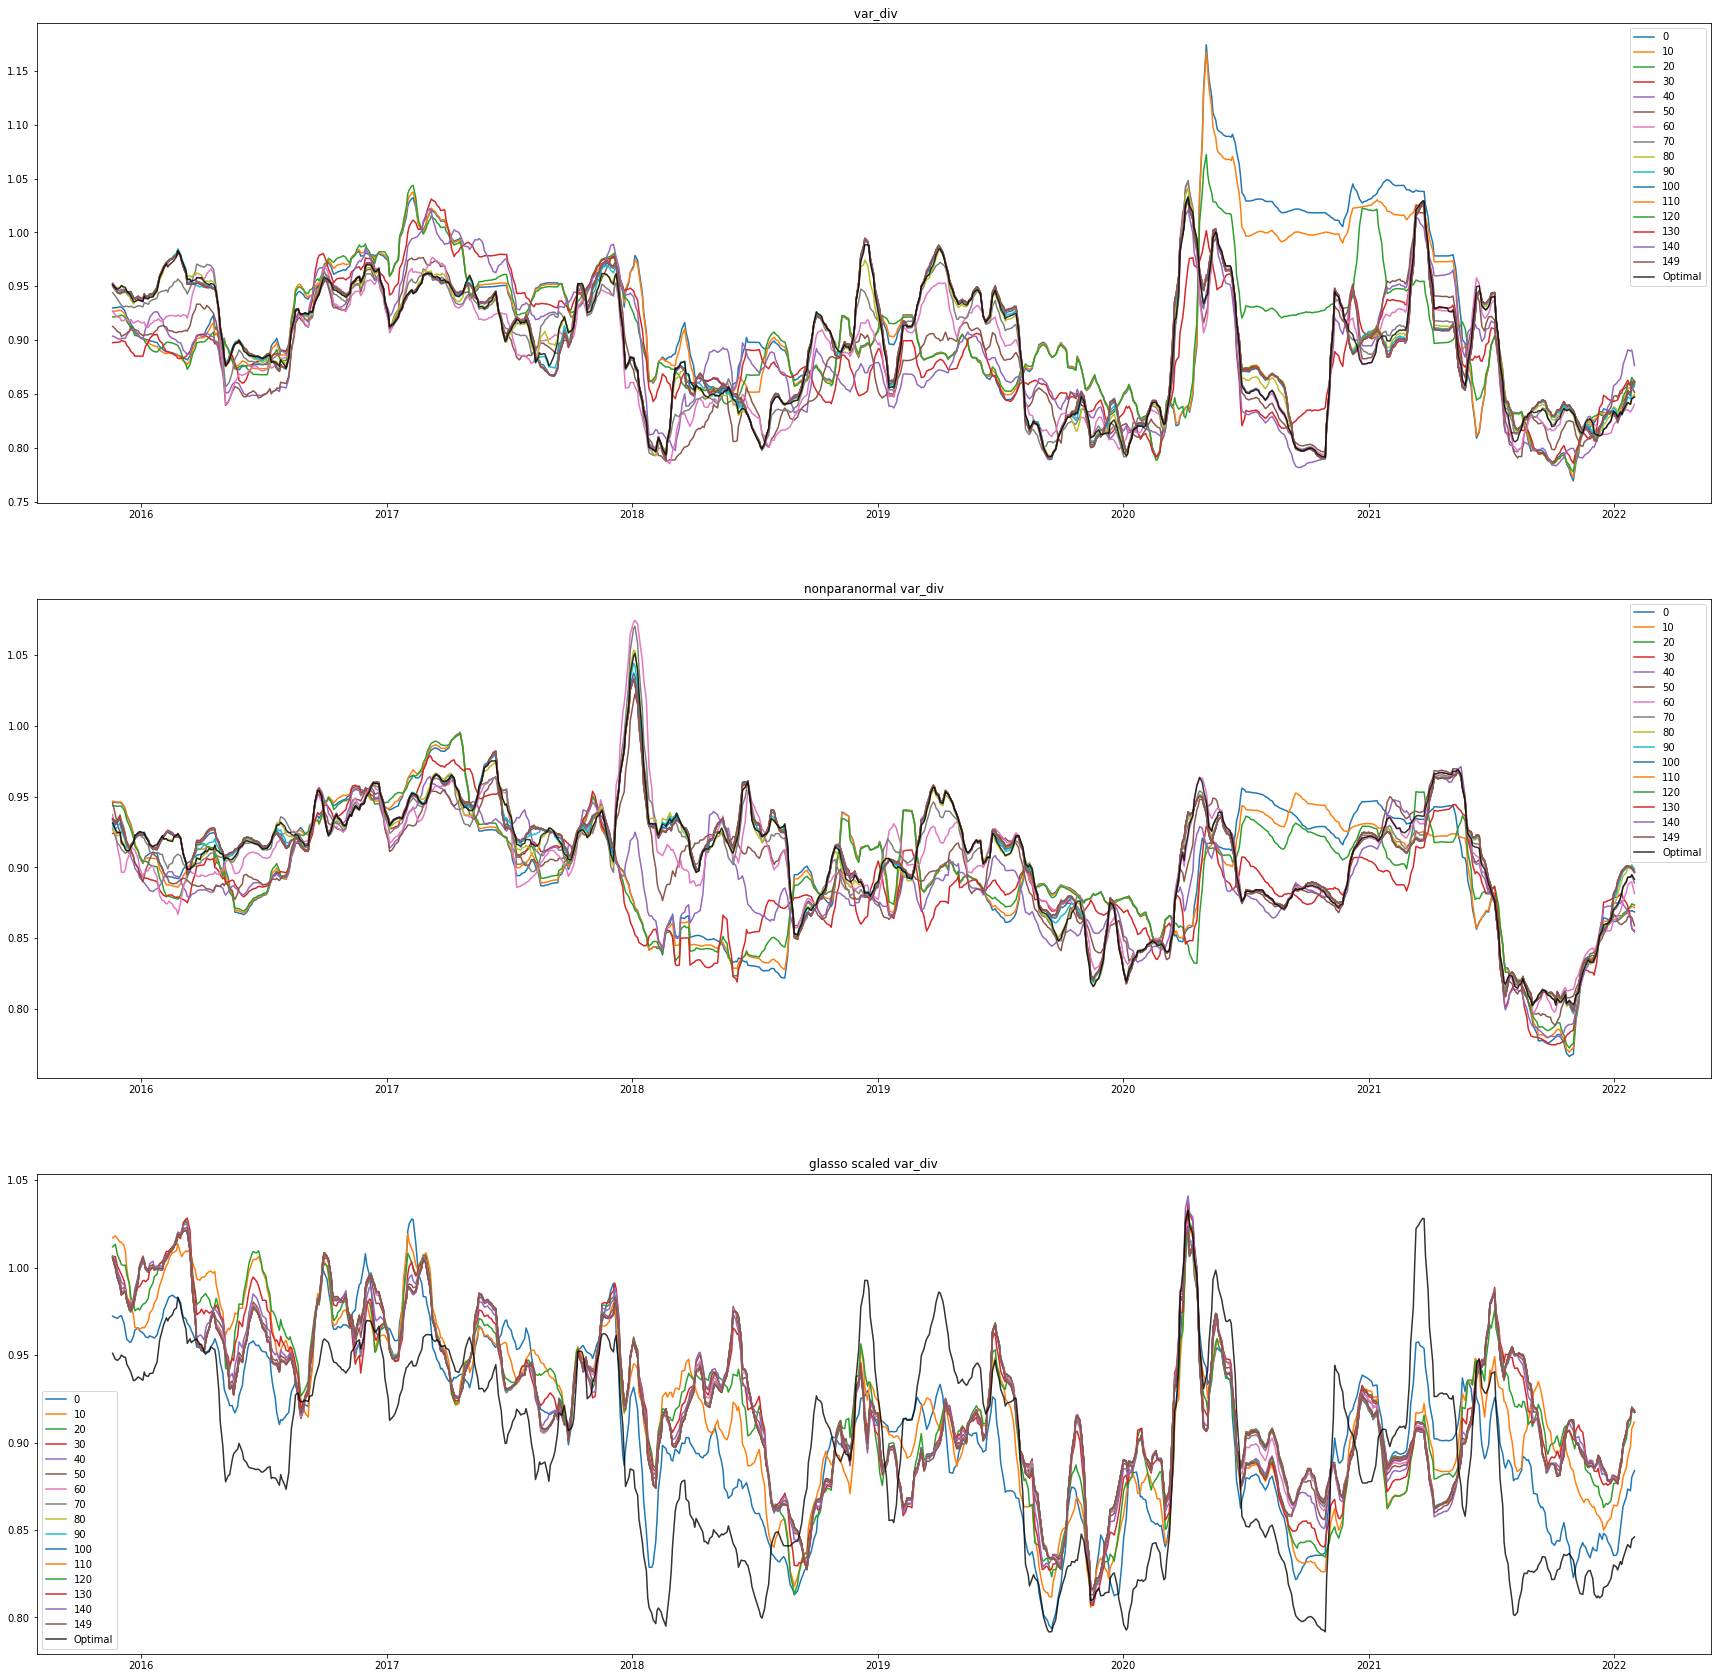

In [140]:
portfolio_type = 'gmv'
group = 0
metric = 'var_div'

fig, ax = plt.subplots(3,1, figsize = (30,30))
plot_regularization(scale_F_none, portfolio_type, group, metric, ax = ax[0], title = '')
plot_regularization(scale_F_nonparanormal, portfolio_type, group, metric, ax = ax[1], title = 'nonparanormal')
plot_regularization(scale_T_none, portfolio_type, group, metric, ax = ax[2], title = 'glasso scaled')






Look at if the splits are uniform

Text(0.5, 1.0, 'Portfolio Membership of Assets')

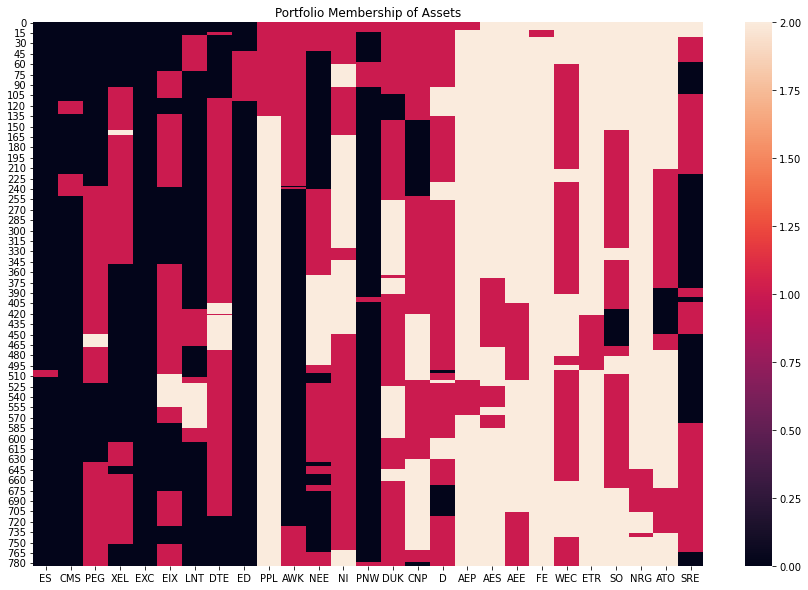

In [147]:
unique_stocks =np.concatenate((scale_F_nonparanormal['stock_partition'][0][0],scale_F_nonparanormal['stock_partition'][1][0],scale_F_nonparanormal['stock_partition'][2][0]))
n = len(scale_F_nonparanormal['stock_partition'][0])
p = len(unique_stocks)
unique_stocks = pd.DataFrame(np.zeros((n,p)), columns= unique_stocks)

for col in unique_stocks.columns:
    for i in range(len(scale_F_nonparanormal['stock_partition'][0])):
        for j in range(3):
            if col in scale_F_nonparanormal['stock_partition'][j][i]:
                unique_stocks[col].iloc[i] = j
                continue

fig, ax = plt.subplots(1,1, figsize = (15,10))
sns.heatmap(unique_stocks)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("Portfolio Membership of Assets")

Count number proportion of sector in each ckass

In [186]:
n = len(scale_F_nonparanormal['stock_partition'][0])
p = 11
sector_count = pd.DataFrame(np.zeros((n*3,12)), columns= np.concatenate((list(sector_classification.keys()), ["group"])))

for k in sector_classification.keys():
    for i in range(len(scale_F_nonparanormal['stock_partition'][0])):
        for j in range(3):
            cnt = np.sum(np.isin(scale_F_nonparanormal['stock_partition'][j][i], sector_classification[k]))
            sector_count[k].iloc[(i*3)+j] = cnt
            sector_count['group'].iloc[(i*3)+j] = j


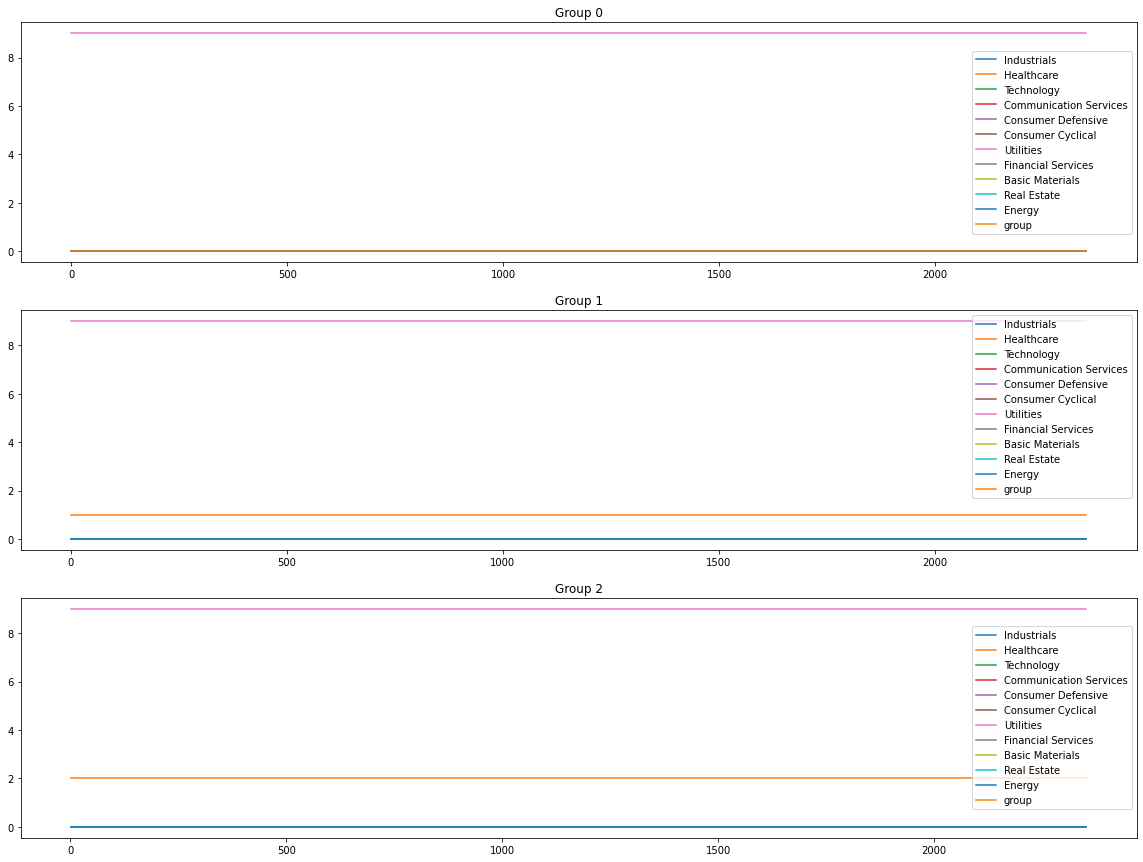

In [149]:
fig, ax = plt.subplots(3,1, figsize = (20,15))
for j in range(3):
    # [['Utilities', 'Energy', 'Basic Materials']]
    sector_count.loc[sector_count['group'] == j].plot(ax = ax[j], title = f'Group {j}')



Look at mmd

In [204]:
scale = False
trans = 'nonparanormal'
rw = 'weight'
ptype = 'uniform'
n = 20
dstep = 5
glabel = None# "signed" #None
gname = 'graph_dict'
with open(f'../data/mmd_test/{study}_d_1_winlen_300_gest_huge_glasso_ebic_scale_{scale}_trans_{trans}_gname_{gname}_n_{n}_B_5000_rw_{rw}_dstep_{dstep}_glabel_{glabel}_wfun_None_p_{ptype}.pkl', 'rb') as f:
    test_info = pickle.load(f)
test_info.keys()





dict_keys(['info_dict', 'sector', 'n', 'dates', 'graph_dict', 'scale', 'transform'])

check if hyperparameter stayed the same throughout

(array([150.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([0.     , 0.07002, 0.14004, 0.21006, 0.28008, 0.3501 , 0.42012,
        0.49014, 0.56016, 0.63018, 0.7002 ]),
 <BarContainer object of 10 artists>)

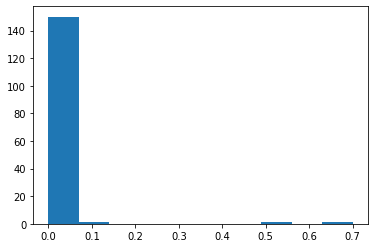

In [205]:
plt.hist(test_info['info_dict']['MMD_u'])

In [155]:
test_info['info_dict']

sector  group_i  group_j  MMD_u  MMD_b  MMD_l kernel  r             c  \
0   Utilities        0        2    0.0    0.0    0.0     rw  6  1.000000e-10   
1   Utilities        0        2    0.0    0.0    0.0     rw  6  1.000000e-10   
2   Utilities        0        2    0.0    0.0    0.0     rw  6  1.000000e-10   
3   Utilities        0        2    0.0    0.0    0.0     rw  6  1.000000e-10   
4   Utilities        0        2    0.0    0.0    0.0     rw  6  1.000000e-10   
..        ...      ...      ...    ...    ...    ...    ... ..           ...   
72  Utilities        0        2    0.0    0.0    0.0     rw  6  1.000000e-10   
73  Utilities        0        2    0.0    0.0    0.0     rw  6  1.000000e-10   
74  Utilities        0        2    0.0    0.0    0.0     rw  6  1.000000e-10   
75  Utilities        0        2    0.0    0.0    0.0     rw  6  1.000000e-10   
76  Utilities        0        2    0.0    0.0    0.0     rw  6  1.000000e-10   

         dates   dates_mid  
0   2016-01-08  2015-12-09  
1   2016-02-08  2016-01-08  
2   2016-03-08  2016-02-08  
3   2016-04-06  2016-03-08  
4   2016-05-04  2016-04-06  
..         ...         ...  
72  2021-09-28  2021-08-30  
73  2021-10-26  2021-09-28  
74  2021-11-23  2021-10-26  
75  2021-12-22  2021-11-23  
76  2022-01-21  2021-12-22  

[77 rows x 11 columns]

In [157]:
print(np.unique(test_info['info_dict']['c']))
print(np.unique(test_info['n']))

[1.e-10]
[20]


 Plot mmd and compare with diversification

In [202]:
def div_ratio(w, cov):
  # numerator is perfect correlation
  # denom is portfolio risk
  # np.inner(w, np.sqrt(np.diag(cov)))/
  return np.dot(w, cov).dot(w)

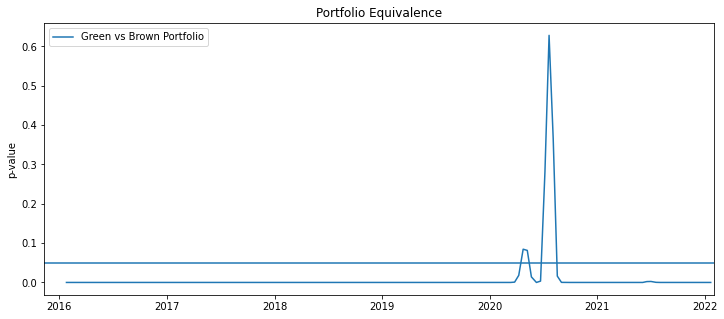

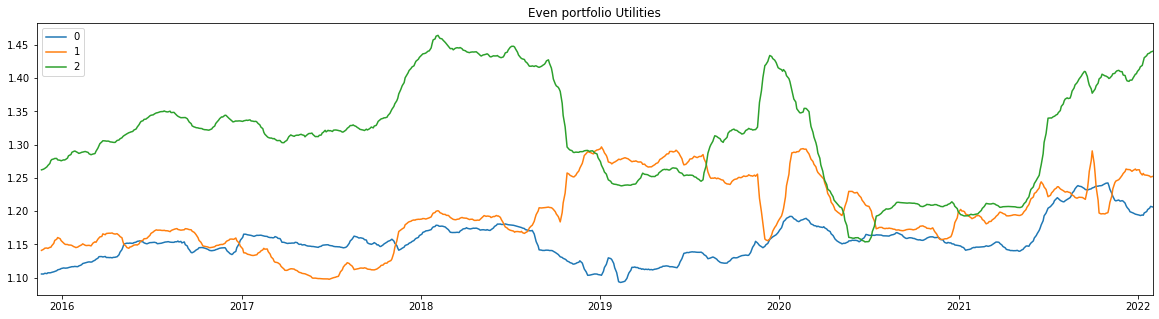

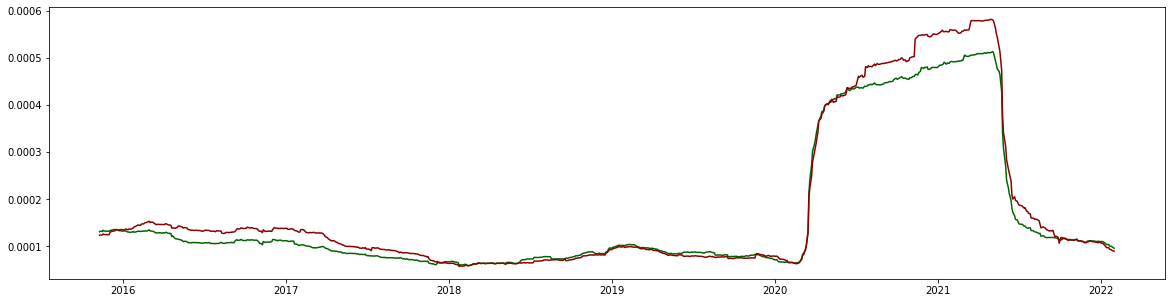

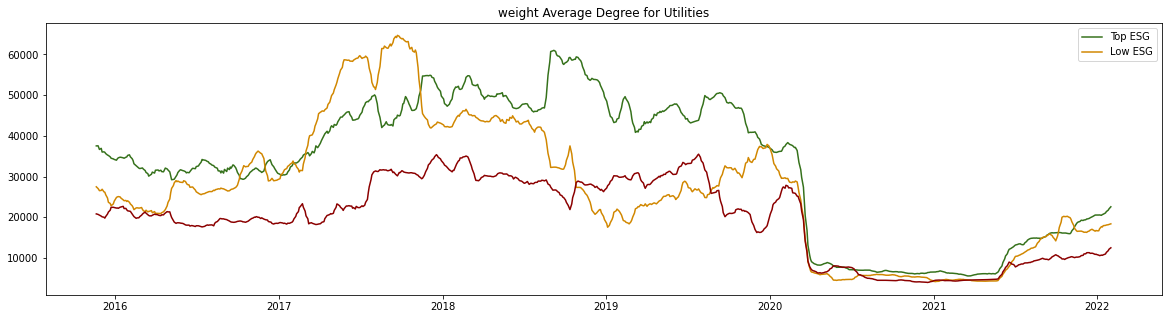

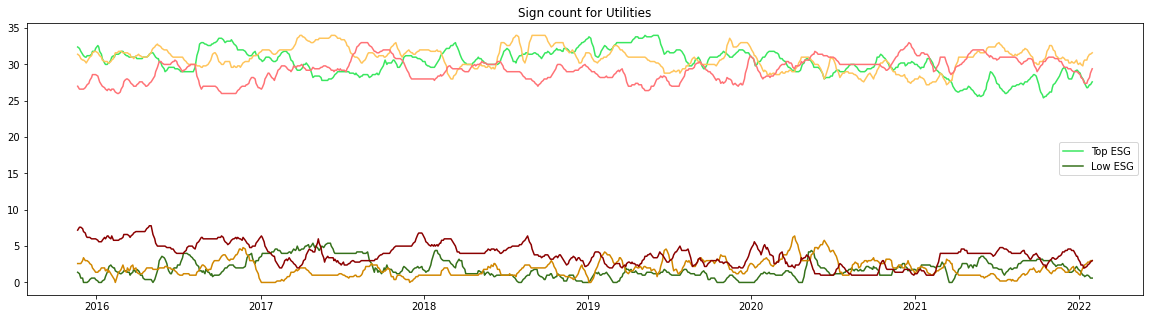

In [207]:

tmp = test_info['info_dict']
sector = test_info['sector']
fig ,ax = plt.subplots(1,1, figsize = (12,5))

tmp['id'] = tmp['group_i'].astype(str) + tmp['group_j'].astype(str) 
for id in ["02"]:#np.unique(tmp['id']):
    #ax.plot(tmp['dates'].loc[tmp['id'] == id], tmp['MONK_EST'].loc[tmp['id'] == id], label = "monk")
    tmp_tmp = tmp.loc[tmp['id'] == id]

    ax.plot(tmp['dates'].loc[tmp['id'] == id], tmp['MMD_u'].loc[tmp['id'] == id].rolling(2).mean(), label = "Top vs Low Portfolio")
    #ax.scatter(tmp['dates'].loc[tmp['id'] == id], tmp['MMD_u'].loc[tmp['id'] == id], label = 'Green vs Brown Portfolio')
ax.axhline(y = 0.05)
ax.legend(loc = 'upper left')
ax.set_title('Portfolio Equivalence')
ax.set_ylabel('p-value')
ax.set_xlim([np.min(scale_F_nonparanormal['dates']), np.max((np.max(scale_F_nonparanormal['dates']),np.max(tmp['dates'])))])

fig, ax = plt.subplots(1,1, figsize = (20,5))
metric = 'cov_div'
pd.DataFrame(scale_F_nonparanormal['portfolios_info'][ptype][metric], index = scale_F_nonparanormal['dates']).rolling(5).mean().plot(ax = ax, title = f'Even portfolio {sector}' )
#pd.DataFrame(data_dict[idx]['portfolios_info']['sharpe'][metric], index = data_dict[idx]['dates']).rolling(5).mean().plot(ax = ax[1], title = f'Max Sharpe {sector}')
#pd.DataFrame(data_dict[idx]['portfolios_info']['gmv'][metric], index = data_dict[idx]['dates']).rolling(5).mean().plot(ax = ax[2], title = f'Global minimum {sector}')
ax.set_xlim([np.min(scale_F_nonparanormal['dates']), np.max((np.max(scale_F_nonparanormal['dates']),np.max(tmp['dates'])))])
#ax[1].set_xlim([np.min(data_dict[idx]['dates']), np.max((np.max(data_dict[idx]['dates']),np.max(tmp['dates'])))])
#ax[2].set_xlim([np.min(data_dict[idx]['dates']), np.max((np.max(data_dict[idx]['dates']),np.max(tmp['dates'])))])


fig,ax = plt.subplots(1,1, figsize = (20,5))
ax.plot(scale_F_nonparanormal['dates'], [div_ratio(scale_F_nonparanormal['portfolios_info'][ptype]['weights'][0][i],scale_F_nonparanormal['cov_dict'][0][i]) for i in range(len(scale_F_nonparanormal['dates']))], color = "Darkgreen")
ax.plot(scale_F_nonparanormal['dates'], [div_ratio(scale_F_nonparanormal['portfolios_info'][ptype]['weights'][2][i],scale_F_nonparanormal['cov_dict'][2][i]) for i in range(len(scale_F_nonparanormal['dates']))], color = "Darkred")

fig, ax = plt.subplots(1,1, figsize = (20,5))
plot_avg_degree(scale_F_nonparanormal, weight = 'weight', ax = ax)
fig, ax = plt.subplots(1,1, figsize = (20,5))
plot_G_signs(scale_F_nonparanormal, ax = ax)

In [60]:
data_dict[2]['portfolios_info'].keys()

dict_keys(['uniform', 'sharpe', 'gmv'])

Let's test manually. Seems like there is some fishyness going on

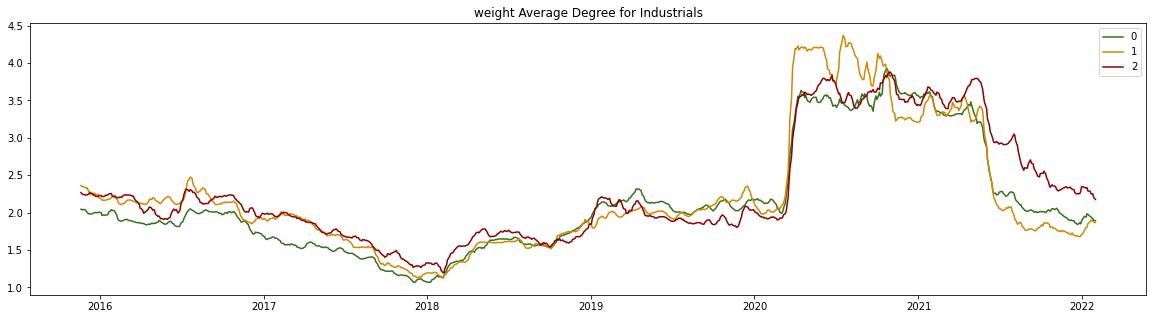

In [69]:
scale = False
trans = 'nonparanormal'
with open(f'../data/Graphs/Industrials_d_1_winlen_300_gest_huge_glasso_ebic.pkl', 'rb') as f:
    data_dict = pickle.load(f)

fig, ax = plt.subplots(1,1, figsize = (20,5))
plot_avg_degree(data_dict[0], weight = 'weight', ax = ax)

In [83]:
index = np.where((data_dict[2]['dates'] > datetime.date(2019,3,1)) & (data_dict[2]['dates'] <= datetime.date(2019,4,1)))[0]
print(len(index))
index = index[:20]

10


In [84]:
from util import avg_degree
# G1 = [nx.from_numpy_array(nx.adjacency_matrix(data_dict[0]['graph_dict'][0][i]).todense()/1000) for i in index] 
# G2 = [nx.from_numpy_array(nx.adjacency_matrix(data_dict[0]['graph_dict'][2][i]).todense()/1000) for i in index]
G1 = [data_dict[2]['graph_dict2'][0][i] for i in index] 
G2 = [data_dict[2]['graph_dict2'][2][i] for i in index]
# for j,i in enumerate(index):
#     nx.set_node_attributes(G1[j], {key: [value] for key, value in enumerate(data_dict[2]['portfolios_info']['sharpe']['weights'][0][i])},'attr')
# for j,i in enumerate(index):
#     nx.set_node_attributes(G2[j], {key: [value] for key, value in enumerate(data_dict[2]['portfolios_info']['sharpe']['weights'][2][i])},'attr')

Gs = G1 + G2
#Gs = [nx.from_numpy_array(np.abs(nx.adjacency_matrix(Gs[k]).todense())) for k in range(len(Gs))]

def degreelabels( G):

    nodes_degree = dict(G.degree)
    return {key: str(value) for key, value in nodes_degree.items()}

for i in range(len(Gs)):
    nx.set_node_attributes(Gs[i], degreelabels(Gs[i]),'label')




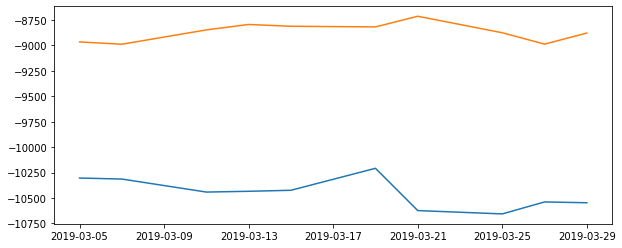

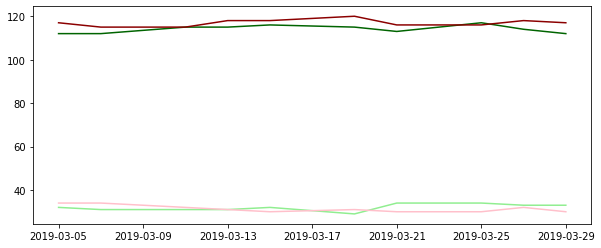

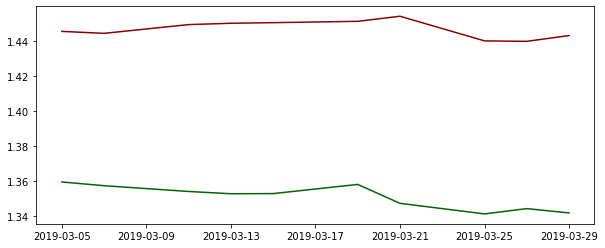

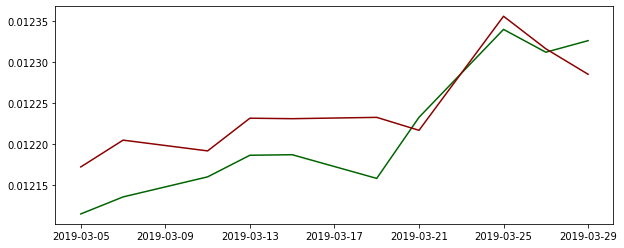

In [85]:
fig,ax = plt.subplots(1,1, figsize = (10,4))
ax.plot(data_dict[0]['dates'][index], [avg_degree(G1[i], 'weight') for i in range(len(G1))])
ax.plot(data_dict[0]['dates'][index], [avg_degree(G2[i], 'weight') for i in range(len(G2))])

fig,ax = plt.subplots(1,1, figsize = (10,4))
ax.plot(data_dict[0]['dates'][index], [cnt_pos_neg(G1[i], 1) for i in range(len(G1))], color = "DarkGreen")
ax.plot(data_dict[0]['dates'][index], [cnt_pos_neg(G1[i], -1) for i in range(len(G1))], color = "lightgreen")

ax.plot(data_dict[0]['dates'][index], [cnt_pos_neg(G2[i], 1) for i in range(len(G2))], color = "Darkred")
ax.plot(data_dict[0]['dates'][index], [cnt_pos_neg(G2[i], -1) for i in range(len(G2))], color = "pink")

fig,ax = plt.subplots(1,1, figsize = (10,4))
ax.plot(data_dict[0]['dates'][index], [data_dict[2]['portfolios_info']['uniform']['cov_div'][0][i] for i in index], color = "Darkgreen")
ax.plot(data_dict[0]['dates'][index], [data_dict[2]['portfolios_info']['uniform']['cov_div'][2][i] for i in index], color = "Darkred")

fig,ax = plt.subplots(1,1, figsize = (10,4))
ax.plot(data_dict[0]['dates'][index], [div_ratio(data_dict[2]['portfolios_info']['uniform']['weights'][0][i],data_dict[2]['cov_dict'][0][i]) for i in index], color = "Darkgreen")
ax.plot(data_dict[0]['dates'][index], [div_ratio(data_dict[2]['portfolios_info']['uniform']['weights'][0][i],data_dict[2]['cov_dict'][2][i]) for i in index], color = "Darkred")

In [119]:
np.mean(list(G2.degree(weight = 'weight')),axis = 0)

array([9.50000000e+00, 1.38385124e+04])

In [112]:
sys.path.insert(0, 'C:/Users/User/Code/MMD_Graph_Diversification')
sys.path.insert(0, 'C:/Users/User/Code/MMD_Graph_Diversification/myKernels')

import MMDforGraphs as mg
from myKernels import RandomWalk as rw
import grakel as gk
n = len(G1)
weights = data_dict[0]['portfolios_info']['uniform']['weights']
p =  np.vstack(([ weights[0][s] for s in index],[ weights[2][s] for s in index]))
rw_kernel = rw.RandomWalk(Gs, c = 1e-10, normalize=0, p = p, q = p)
#K = rw_kernel.fit_ARKU_plus(r = 6, normalize_adj=False, verbose=False, edge_attr= 'weight')
K  = rw_kernel.fit_random_walk(r = 6, k = 3, mu_vec=[1,1e-10,(1e-10)**2,(1e-10)**3,1,1])
#K = rw_kernel.fit_ARKU_edge(r = 6, edge_labels = [1,-1], verbose=False, edge_attr = 'weight', edge_label_tag='sign')

## Grakel kernels
# graph_list = gk.graph_from_networkx(Gs, node_labels_tag='attr')  # Convert to graphs to Grakel format 
# kernel = [{"name": "propagation", "t_max": 4, "w":0.01, "M":'L1','with_attributes':True}]
# init_kernel = gk.GraphKernel(kernel= kernel, normalize=0)
# K = init_kernel.fit_transform(graph_list)

MMD_functions = [mg.MMD_b, mg.MMD_u, mg.MMD_l]#, mg.MONK_EST]
kernel_hypothesis = mg.BoostrapMethods(MMD_functions)
function_arguments = [dict(n = n, m = n  ), 
                    dict(n = n, m = n ),
                    dict(n = n, m = n )]#, 
                    #dict(Q = 3, y1 = Gs[:bg1.n], y2 = Gs[bg1.n:] )]
                    #dict(Q = 5, y1 = list(range(n)), y2 = list(range(n, n+n)) )]
kernel_hypothesis.Bootstrap(K, function_arguments, B = 3000)





# Run power
#print(f'V {V}')
#print(f'ratio {ratio}')
#print(f'power {power}')
print(f'p_value {kernel_hypothesis.p_values}')
#print(f"MMD_u {kernel_hypothesis.sample_test_statistic['MMD_u']}")

l, _= np.linalg.eigh(K)
l



100%|██████████| 210/210.0 [00:00<00:00, 5998.64it/s]


p_value {'MMD_b': 0.0033333333333333335, 'MMD_u': 0.0033333333333333335, 'MMD_l': 0.01}


array([-8.17469283e-18, -2.79384784e-18, -1.95485531e-18, -1.53630652e-18,
       -1.44760485e-18, -1.15007050e-18, -7.69035567e-19, -3.25114461e-19,
       -2.85487764e-19,  6.17176001e-20,  1.26965268e-19,  6.15883113e-19,
        6.69716544e-19,  1.09778640e-18,  1.39054473e-18,  1.57103853e-18,
        2.26812441e-18,  2.52722227e-18,  1.90330722e-13,  4.80519515e-02])

<AxesSubplot:>

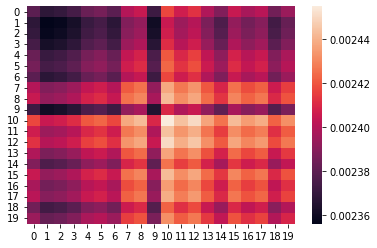

In [113]:
import seaborn as sns
sns.heatmap(K)

In [96]:
sys.path.insert(0, 'C:/Users/User/Code/MMD_Graph_Diversification')
sys.path.insert(0, 'C:/Users/User/Code/MMD_Graph_Diversification/myKernels')

import MMDforGraphs as mg
from myKernels import RandomWalk as rw
n = len(G1)
rw_kernel = rw.RandomWalk(Gs, c = 1e-11, normalize=0)
K = rw_kernel.fit_ARKU_edge(r = 10, verbose=False, edge_attr= 'weight', edge_label_tag='sign', edge_labels=[-1,1])

MMD_functions = [mg.MMD_b, mg.MMD_u, mg.MMD_l]#, mg.MONK_EST]
kernel_hypothesis = mg.BoostrapMethods(MMD_functions)
function_arguments = [dict(n = n, m = n  ), 
                    dict(n = n, m = n ),
                    dict(n = n, m = n )]#, 
                    #dict(Q = 3, y1 = Gs[:bg1.n], y2 = Gs[bg1.n:] )]
                    #dict(Q = 5, y1 = list(range(n)), y2 = list(range(n, n+n)) )]
kernel_hypothesis.Bootstrap(K, function_arguments, B = 5000)

# Run power
#print(f'V {V}')
#print(f'ratio {ratio}')
#print(f'power {power}')
print(f'p_value {kernel_hypothesis.p_values}')
#print(f"MMD_u {kernel_hypothesis.sample_test_statistic['MMD_u']}")
np.linalg.eigh(K)

p_value {'MMD_b': 0.0, 'MMD_u': 0.0, 'MMD_l': 0.0}


(array([-3.52035622e-18, -8.84019675e-19, -7.46315441e-19, -4.82262557e-19,
        -4.00143912e-19, -2.66269404e-19, -1.53007199e-19,  1.96665424e-20,
         2.11965939e-19,  3.08821456e-19,  4.21706455e-19,  7.05773381e-19,
         6.59514730e-18,  1.42057627e-16,  2.55247528e-16,  5.66493655e-14,
         6.38925704e-13,  9.00266526e-10,  6.47278888e-07,  5.00572849e-02]),
 array([[-0.744801  ,  0.00314672,  0.109414  , -0.16781342, -0.20111206,
         -0.0115423 ,  0.04246491, -0.03590336,  0.01093136,  0.01997297,
         -0.02370499, -0.00952512,  0.04357617, -0.19982165,  0.20483295,
         -0.1288799 ,  0.05933683, -0.42779456,  0.15282206,  0.22362549],
        [ 0.1634372 ,  0.08696204,  0.04175903, -0.15430533, -0.1126036 ,
          0.00558336,  0.05989877, -0.04228491, -0.04498404,  0.02451657,
         -0.00191957, -0.0152713 , -0.74632626,  0.0358277 , -0.24770395,
         -0.02390369, -0.4083725 , -0.23535513,  0.16382792,  0.22362676],
        [ 0.1050906 , -0

In [97]:
sys.path.insert(0, 'C:/Users/User/Code/MMD_Graph_Diversification')
sys.path.insert(0, 'C:/Users/User/Code/MMD_Graph_Diversification/myKernels')

import MMDforGraphs as mg
from myKernels import RandomWalk as rw
n = len(G1)
rw_kernel = rw.RandomWalk(Gs, c = 0.0001, normalize=0)
K = rw_kernel.fit_ARKU_edge(r = 10, verbose=False, edge_attr= None, edge_label_tag='sign', edge_labels=[-1,1])

MMD_functions = [mg.MMD_b, mg.MMD_u, mg.MMD_l, mg.MONK_EST]
kernel_hypothesis = mg.BoostrapMethods(MMD_functions)
function_arguments = [dict(n = n, m = n  ), 
                    dict(n = n, m = n ),
                    dict(n = n, m = n ), 
                    #dict(Q = 3, y1 = Gs[:bg1.n], y2 = Gs[bg1.n:] )]
                    dict(Q = 5, y1 = list(range(n)), y2 = list(range(n, n+n)) )]
kernel_hypothesis.Bootstrap(K, function_arguments, B = 5000)

# Run power
#print(f'V {V}')
#print(f'ratio {ratio}')
#print(f'power {power}')
print(f'p_value {kernel_hypothesis.p_values}')
#print(f"MMD_u {kernel_hypothesis.sample_test_statistic['MMD_u']}")

C:/Users/User/Code/MMD_Graph_Diversification\myKernels\RandomWalk.py:975: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A[idx] = scipy.sparse.csr_matrix(np.abs(nx.linalg.adjacency_matrix(G_tmp, weight = edge_attr)), dtype=np.float64)


p_value {'MMD_b': 0.0, 'MMD_u': 0.0, 'MMD_l': 0.0, 'MONK_EST': 0.0}


In [108]:
import grakel as gk
n = len(G1)
graph_list = gk.graph_from_networkx(Gs, node_labels_tag='label')  # Convert to graphs to Grakel format
kernel = [{"name": "weisfeiler_lehman", "n_iter": 1}, {"name": "vertex_histogram"}]
init_kernel = gk.GraphKernel(kernel= kernel, normalize=0)
K = init_kernel.fit_transform(graph_list)

MMD_functions = [mg.MMD_b, mg.MMD_u, mg.MMD_l, mg.MONK_EST]
kernel_hypothesis = mg.BoostrapMethods(MMD_functions)
function_arguments = [dict(n = n, m = n  ), 
                    dict(n = n, m = n ),
                    dict(n = n, m = n ), 
                    #dict(Q = 3, y1 = Gs[:bg1.n], y2 = Gs[bg1.n:] )]
                    dict(Q = 5, y1 = list(range(n)), y2 = list(range(n, n+n)) )]
kernel_hypothesis.Bootstrap(K, function_arguments, B = 5000)

# Run power
#print(f'V {V}')
#print(f'ratio {ratio}')
#print(f'power {power}')
print(f'p_value {kernel_hypothesis.p_values}')
#print(f"MMD_u {kernel_hypothesis.sample_test_statistic['MMD_u']}")


p_value {'MMD_b': 0.0, 'MMD_u': 0.0, 'MMD_l': 0.0, 'MONK_EST': 0.0988}


<AxesSubplot:>

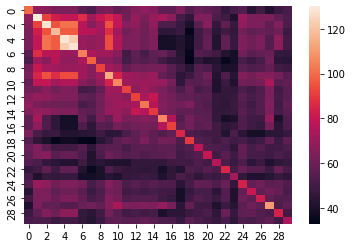

In [90]:
import seaborn as sns
sns.heatmap(K)

# Sklean glasso using 3 folds

In [7]:
with open(f'../data/Graphs/case_study_1_d_1_winlen_150_gest_sklearn_glasso_scale_None.pkl', 'rb') as f:
    data_dict = pickle.load(f)
data_dict[0].keys()

FileNotFoundError: [Errno 2] No such file or directory: '../data/Graphs/TEST_d_1_winlen_300_gest_huge_glasso_ebic_scale_True_trans_None_n_30_B_5000_rw_weight_dstep_10_glabel_None_wfun_None.pkl'

Graph statistics

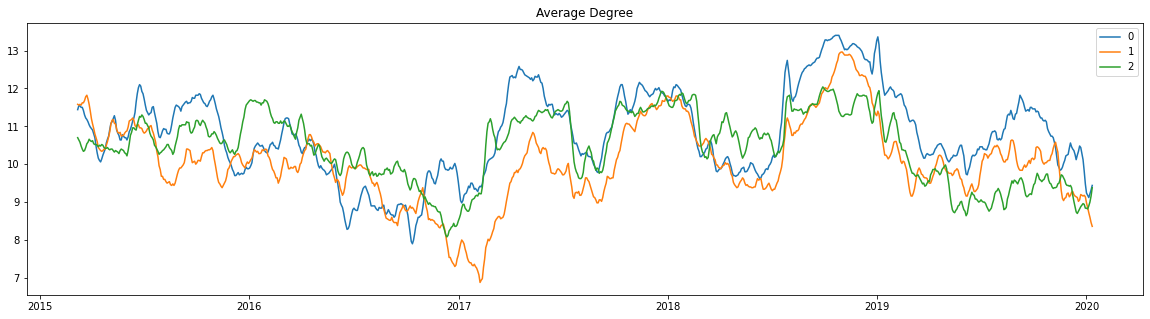

In [262]:
for idx in range(len(data_dict)):

    avg_deg_0 = [np.mean([j for i, j in data_dict[idx]['graph_dict'][0][j].degree]) for j in range(len(data_dict[idx]['graph_dict'][0]))]
    avg_deg_1 = [np.mean([j for i, j in data_dict[idx]['graph_dict'][1][j].degree]) for j in range(len(data_dict[idx]['graph_dict'][1]))] 
    avg_deg_2 = [np.mean([j for i, j in data_dict[idx]['graph_dict'][2][j].degree]) for j in range(len(data_dict[idx]['graph_dict'][2]))]

    fig, ax = plt.subplots(1,1, figsize = (20,5))
    ax.plot(data_dict[idx]['dates'], pd.DataFrame(avg_deg_0).rolling(5).mean().iloc[:,0], label = 0)
    ax.plot(data_dict[idx]['dates'], pd.DataFrame(avg_deg_1).rolling(5).mean().iloc[:,0], label = 1) 
    ax.plot(data_dict[idx]['dates'], pd.DataFrame(avg_deg_2).rolling(5).mean().iloc[:,0], label = 2)
    ax.set_title('Average Degree')
    ax.legend() 

Histogram of portfolio weights

(-10.0, 10.0)

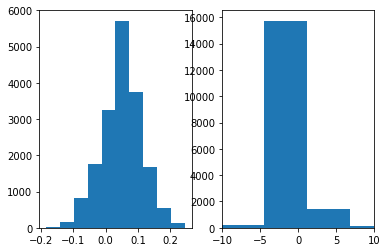

In [263]:
fig, ax = plt.subplots(1,2)
_ = ax[0].hist(np.hstack(data_dict[idx]['GMV_portfolio_dict'][0]))
_ = ax[1].hist(np.hstack(data_dict[idx]['max_sharpe_portfolio_dict'][0]), bins = 1000)
ax[1].set_xlim([-10,10])

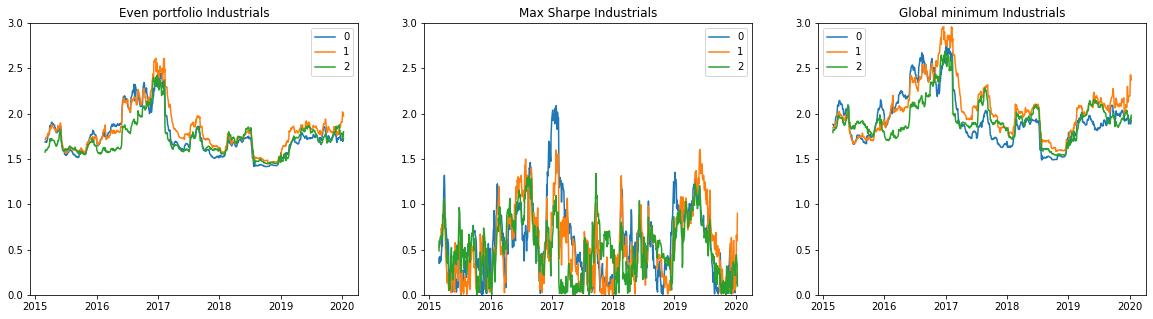

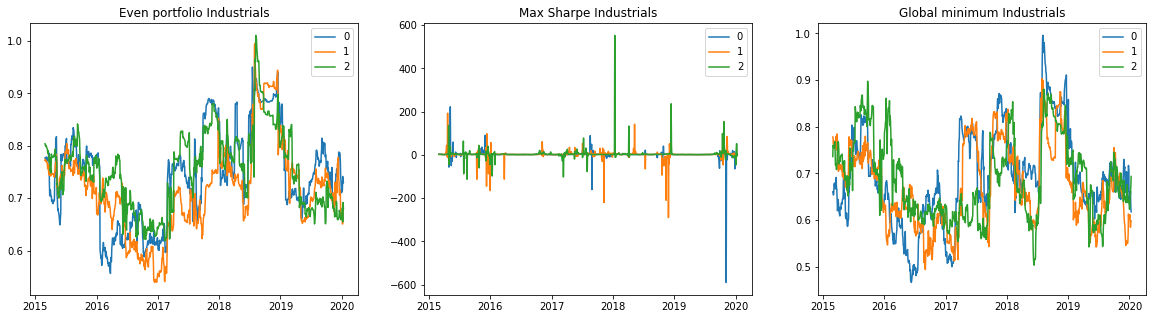

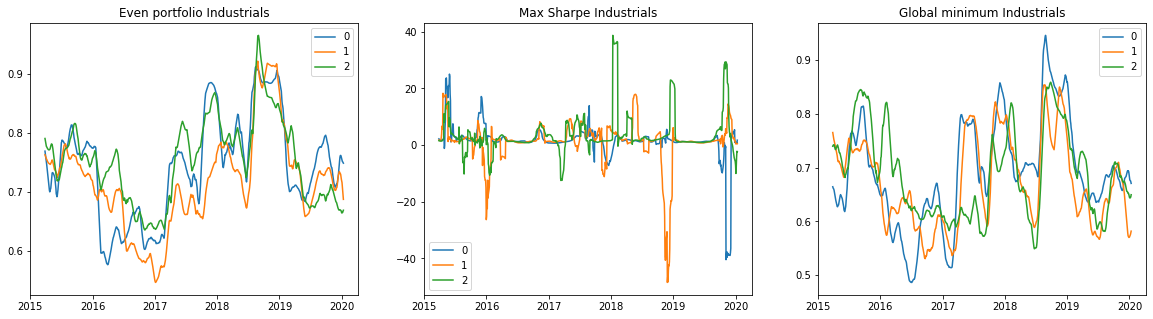

In [264]:
for idx in range(len(data_dict)):
    sector = data_dict[idx]['sector']


    fig, ax = plt.subplots(1,3, figsize = (20,5))
    pd.DataFrame(data_dict[idx]['uni_div_dict'], index = data_dict[idx]['dates']).plot(ax = ax[0], title = f'Even portfolio {sector}', ylim = [0,3])
    pd.DataFrame(data_dict[idx]['sharpe_div_dict'], index = data_dict[idx]['dates']).plot(ax = ax[1], title = f'Max Sharpe {sector}', ylim = [0,3])
    pd.DataFrame(data_dict[idx]['gmv_div_dict'], index = data_dict[idx]['dates']).plot(ax = ax[2], title = f'Global minimum {sector}', ylim = [0,3])

    fig, ax = plt.subplots(1,3, figsize = (20,5))
    pd.DataFrame(data_dict[idx]['uni_var_div_dict'], index = data_dict[idx]['dates']).plot(ax = ax[0], title = f'Even portfolio {sector}' )
    pd.DataFrame(data_dict[idx]['sharpe_var_div_dict'], index = data_dict[idx]['dates']).plot(ax = ax[1], title = f'Max Sharpe {sector}')
    pd.DataFrame(data_dict[idx]['gmv_var_div_dict'], index = data_dict[idx]['dates']).plot(ax = ax[2], title = f'Global minimum {sector}')

    fig, ax = plt.subplots(1,3, figsize = (20,5))
    pd.DataFrame(data_dict[idx]['uni_var_div_dict'], index = data_dict[idx]['dates']).rolling(15).mean().plot(ax = ax[0], title = f'Even portfolio {sector}' )
    pd.DataFrame(data_dict[idx]['sharpe_var_div_dict'], index = data_dict[idx]['dates']).rolling(15).mean().plot(ax = ax[1], title = f'Max Sharpe {sector}')
    pd.DataFrame(data_dict[idx]['gmv_var_div_dict'], index = data_dict[idx]['dates']).rolling(15).mean().plot(ax = ax[2], title = f'Global minimum {sector}')

# Huge Glasso EBIC

In [17]:
with open(f'../data/Graphs/case_study_1_d_1_winlen_300_gest_huge_glasso_ebic_scale_None.pkl', 'rb') as f:
    data_dict = pickle.load(f)
data_dict[0].keys()

dict_keys(['dates', 'graph_dict', 'sector', 'cov_dict', 'GMV_portfolio_dict', 'max_sharpe_portfolio_dict', 'return_dict', 'window_size', 'stock_partition', 'gmv_div_dict', 'gmv_var_div_dict', 'sharpe_div_dict', 'sharpe_var_div_dict', 'uni_div_dict', 'uni_var_div_dict', 'cov_dict2', 'GMV_portfolio_dict2', 'max_sharpe_portfolio_dict2', 'return_dict2', 'gmv_div_dict2', 'gmv_var_div_dict2', 'sharpe_div_dict2', 'sharpe_var_div_dict2', 'uni_div_dict2', 'uni_var_div_dict2'])

Plot graph statistics

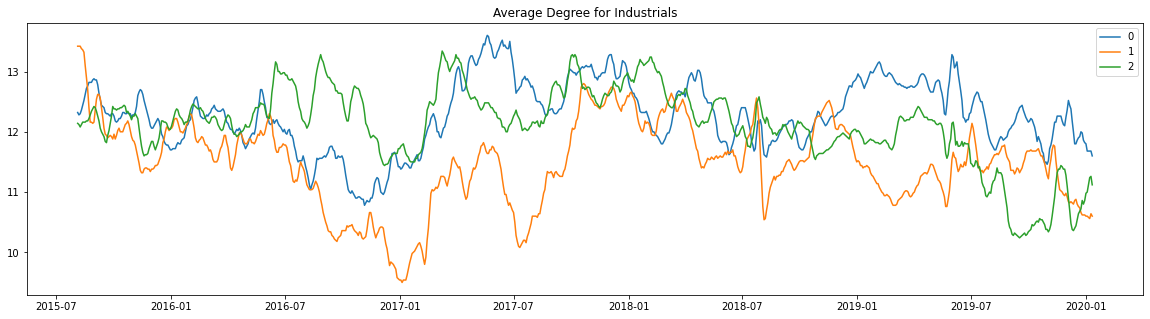

In [18]:
for idx in range(len(data_dict)):
    plot_avg_degree(data_dict[idx])

Look if companies are often jumping

# new